In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10, 10)

%load_ext autoreload
%autoreload 2

from core.quadratic_analyzer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Анализ работы градиентного спуска на квадратичных функциях двух переменных

Рассмотрим такие квадратичные фукнции: ax^2^ + bxy + cy^2^ + dx + ey.
Можно добавить константу, но она никак не влияет решение текущей задачи, так как это просто добавляет вертикальное смещение, которое никак не влияет на
производную, в том числе на численные методы ее вычисления.

Такие функции можно разделить на типы по сечению графика фунцкии по оси значений:
1. Положительно опрделенная форма. В сечении получаются элипсы.
2. Отрицательно опрделенная форма. В сечении получаются гипреболы.
3. a = 0, c = 0. В сечении получаются две прямые.
4. a = 0 или c = 0, то но не оба. В сечении получаются параболы.


## Случай положительно определенной формы.

Это наиболее содержательный случай, так как у функции есть глобальный минимум.

### Метод постоянного шага.
Сходимость методов с постоянным шагом будет сильно зависеть от выбора шага. Если шаг был выбран слишком большой,
то метод разойдется, так как будет ходить вдоль отрезка. На больших значениях будет большая производная, а значит размер реального шага
будет увеличиваться, поэтому траектория точек будет ходить вдоль прямой с потенциальным минимумом, но на каждой следующей итерации будет только
отдаляться от него. При достаточно маленьком шаге метод будет сходиться, но для этого потребуется достаточно много итераций. Оссобенно заметно, что
в точках близких к минимуму сдвиг точки будет невелик, так как длина градиента начинает постепенно уменьшаться. Это создает более плавную траекторию,
что может хорошо работать для более сложных функций с большим количеством станционарных точек, так как траектория не будет "кидаться" по сторонам, но
это приводит к малой эффективности.

### Методы линейного поиска минимума.
По графикам видно, что все методы линейного поиска минимума работают примерно одинаково. Это следует из общего свойства нахождения минимума вдоль градиента, а не идти в "случайную" точку. Также по графикам видно, что для положительно определенных форм траектория образуется из движения вдоль касательных элипсов, которые образованы сечениями функции по оси значений. Это создает "ломанную" траекторию, которая хорошо себя показывает на положительно определенных формах, так как у них есть ровно 1 станционарная точка, а все остальные точки имеют градиент глобально направленных в одно и тоже место. Для сходимости достаточно проведения всего нескольких итераций. Однако весь класс методов требует, чтобы сужение функции вдоль прямой имело производную, которая ровно 1 раз меняет свой знак. При невыполнении этого условия метод, может найти какую-то станционарную точку. Также графики показывают, что минимум вдоль прямой не
обязательно находить точно: при запуске бинарного поиска с ограниченным числом итераций получается сопоставимый результат по числу итераций градиентного спуска.


Optimizing with fixed step = 0.1
Best value found: x* = [-2.94487859  1.34790221] with f(x*) = -7.412340428663294
Optimizing with fixed step = 0.7
Best value found: x* = [1.25272834e+09 2.02695705e+09] with f(x*) = 1.4864891131691411e+19
Optimizing with binary search
Best value found: x* = [-4.  2.] with f(x*) = -8.0
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-3.9835171   1.99364028] with f(x*) = -7.999857075264955
Optimizing with golden ration
Best value found: x* = [-3.99999998  2.00000002] with f(x*) = -7.999999999999998
Optimizing with fibonacci search limited by 10 iterations:
Best value found: x* = [-3.98751432  1.99494282] with f(x*) = -7.99991924229256
Optimizing with backtracking method
Best value found: x* = [-3.99267578  1.99707031] with f(x*) = -7.999972105026245


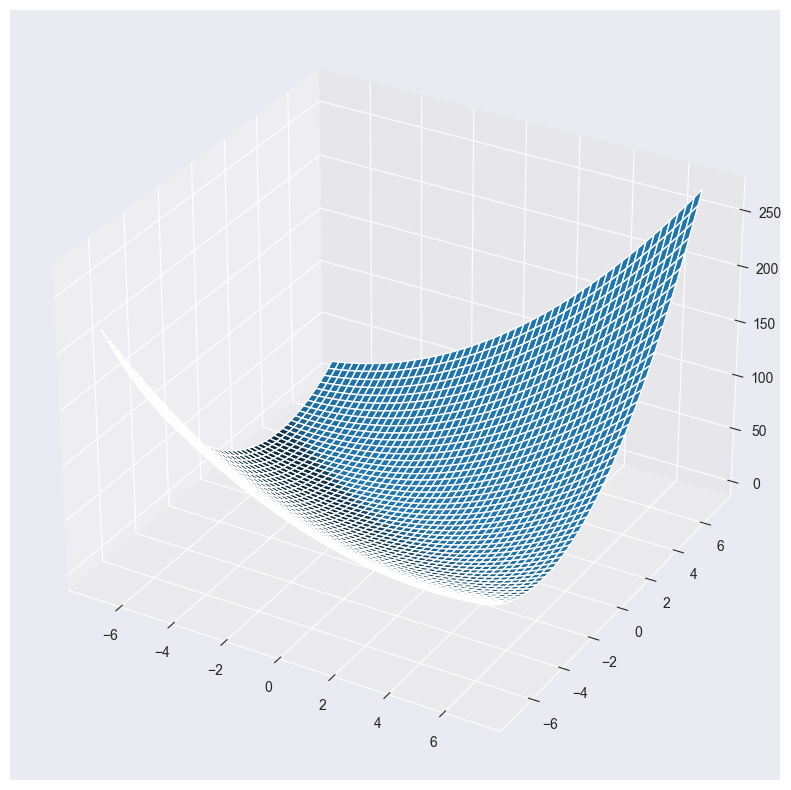

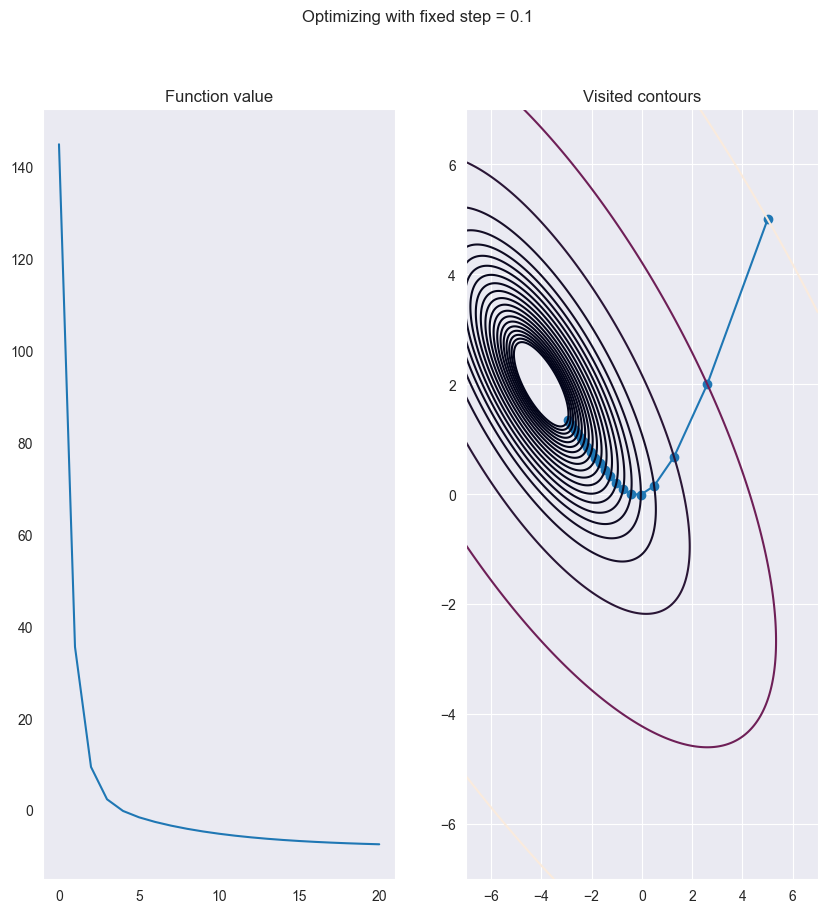

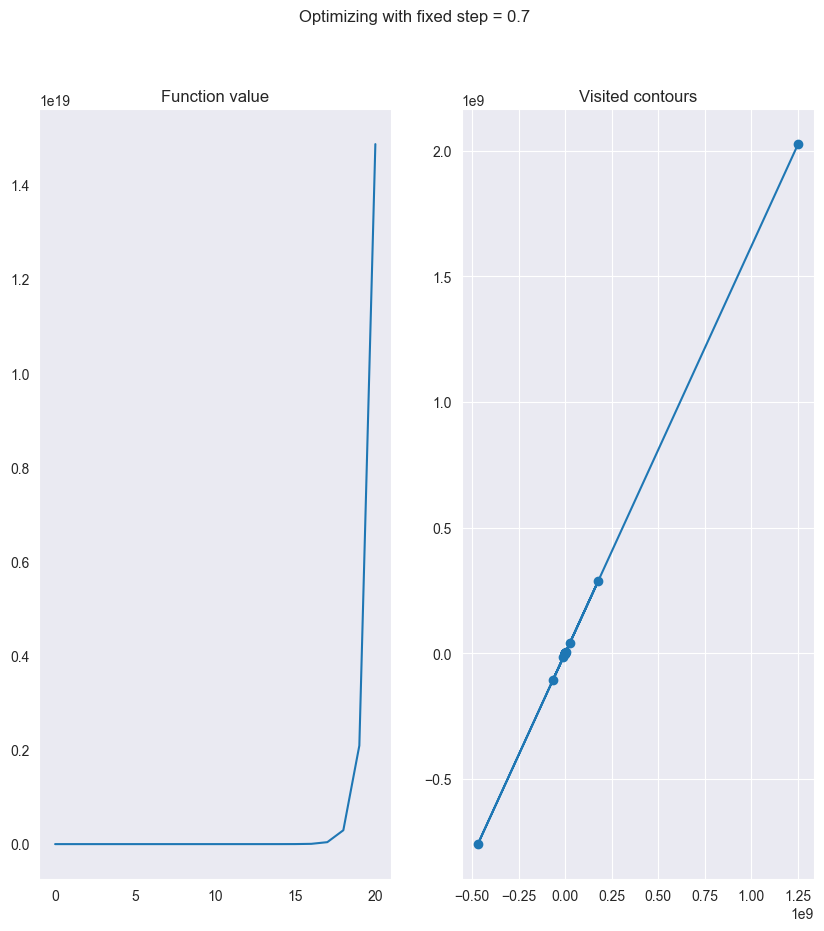

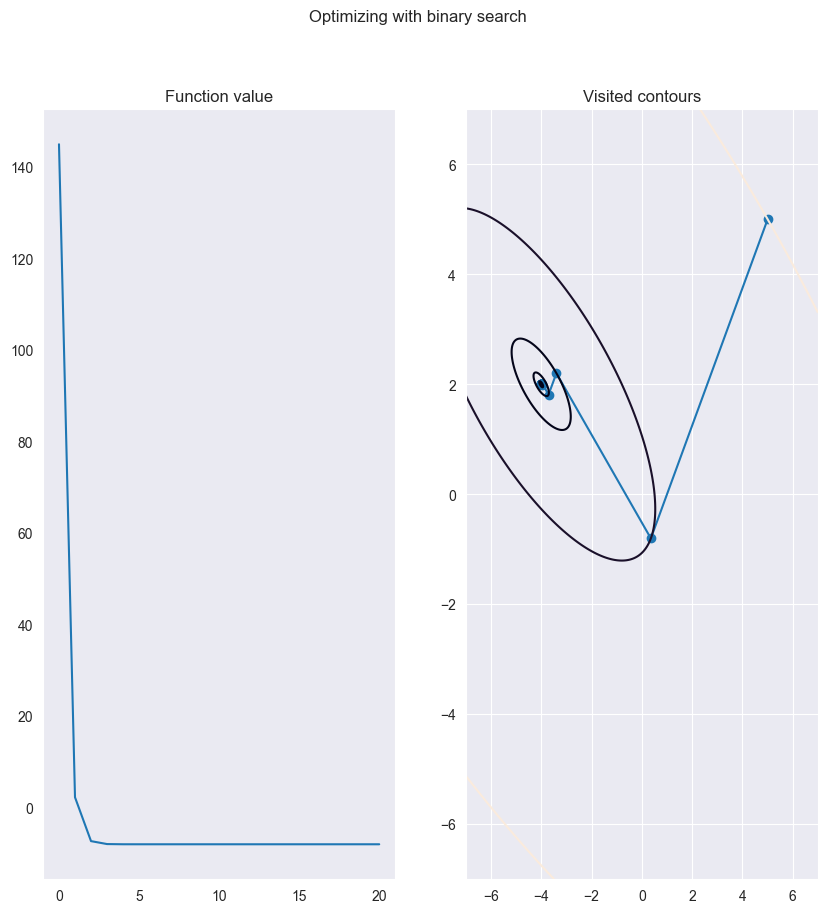

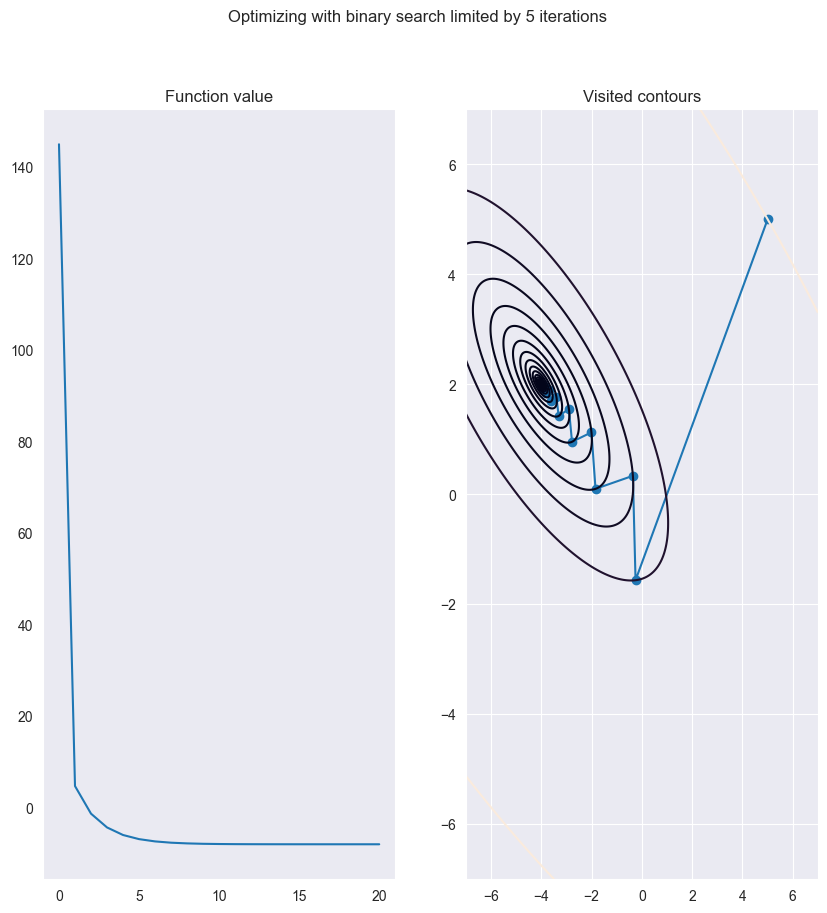

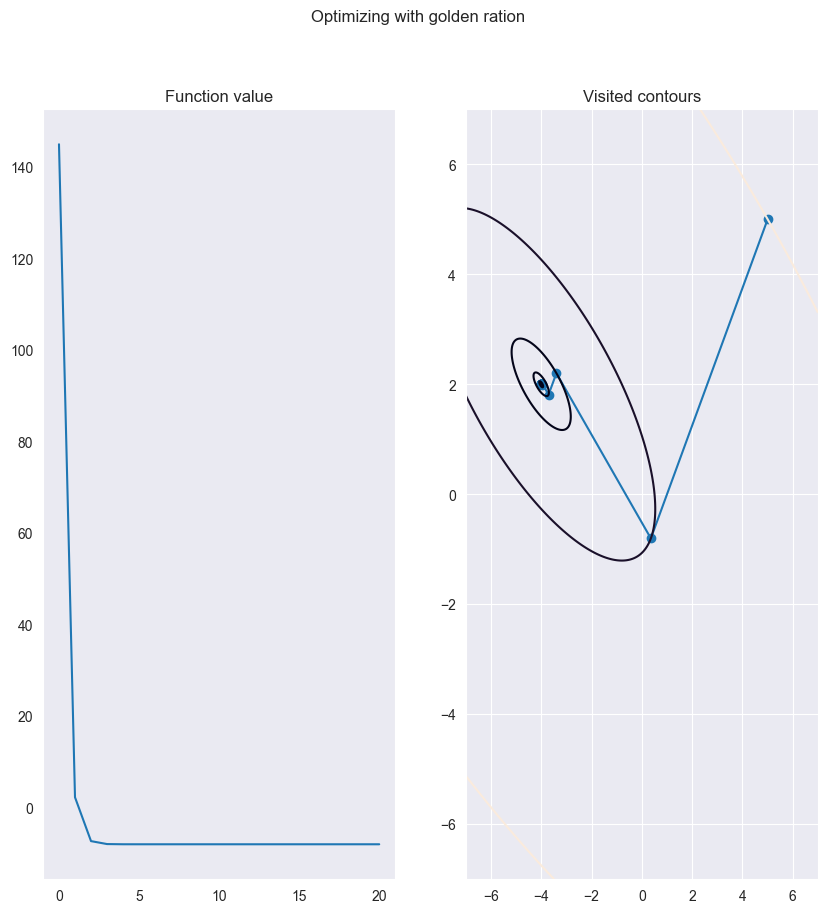

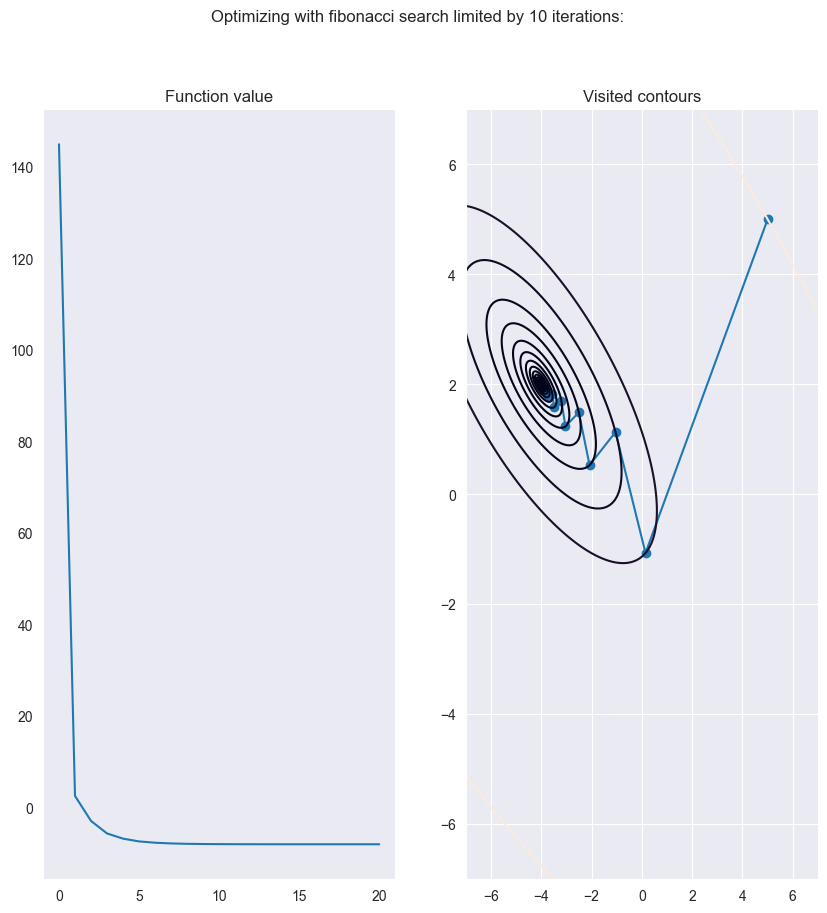

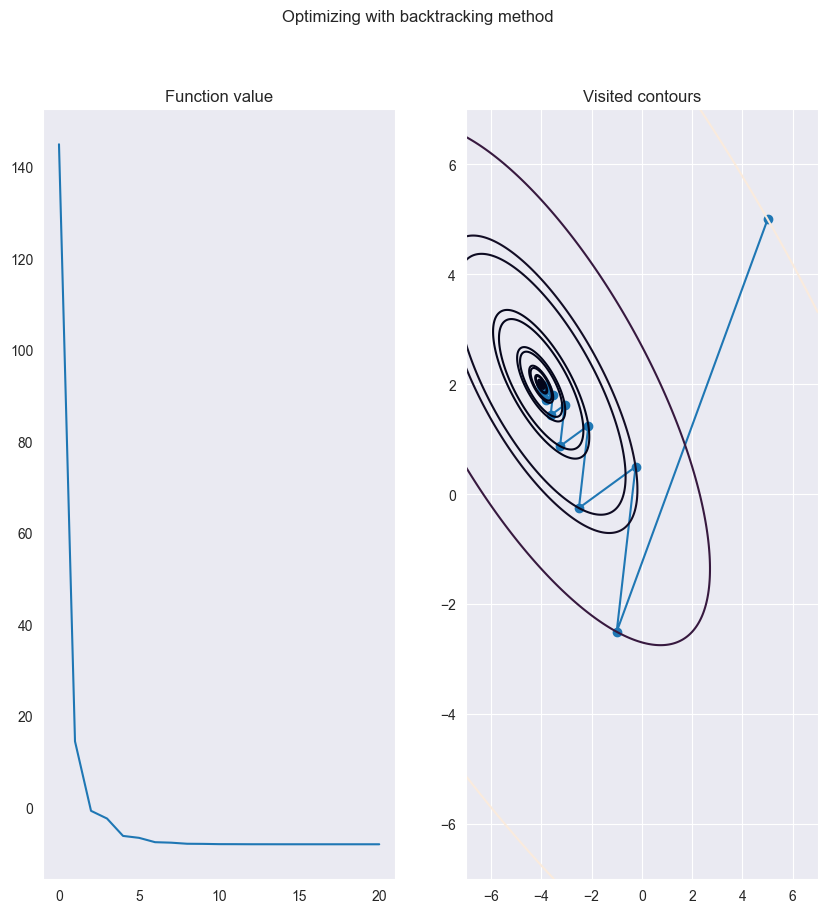

In [17]:
analyze_quadratic(
    roi=SearchRegion2d((-7, 7), (-7, 7)),
    fixed_steps=[0.1, 0.7],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=10,
    a=1, b=2, c=2, d=4, e=0
)

Best value found: x* = [ 71.05157047 302.31485428] with f(x*) = -107452.5241993375
Best value found: x* = [ 4153967.6888752  17596490.95362663] with f(x*) = -365476279429335.94
Best value found: x* = [ 71.05157047 302.31485428] with f(x*) = -107452.5241993375
Best value found: x* = [-8.21639116e+153  1.91715794e+154] with f(x*) = nan
Best value found: x* = [-8.21639116e+153  1.91715794e+154] with f(x*) = nan


KeyboardInterrupt: 

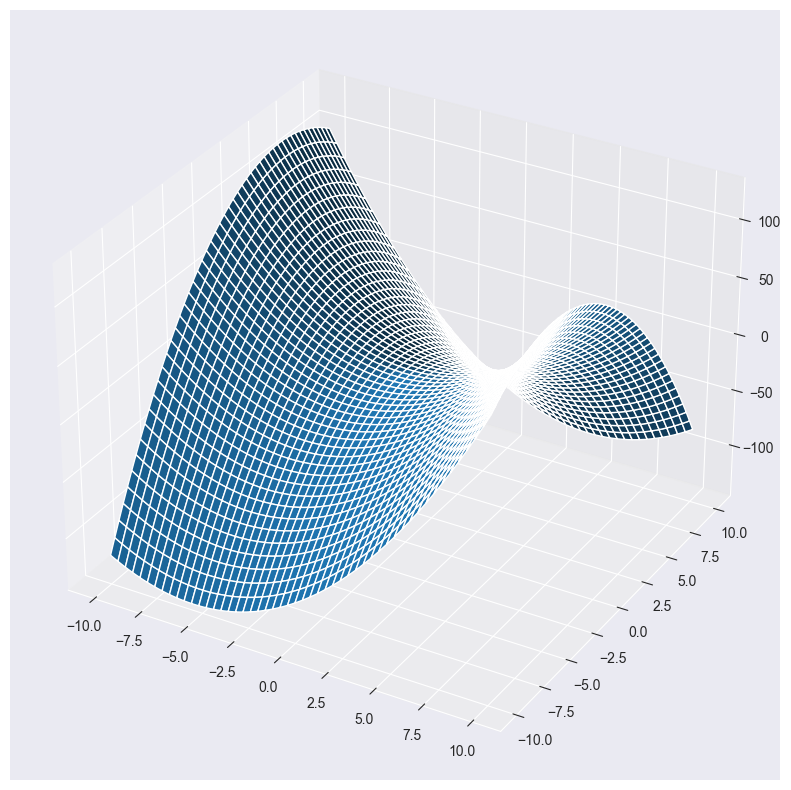

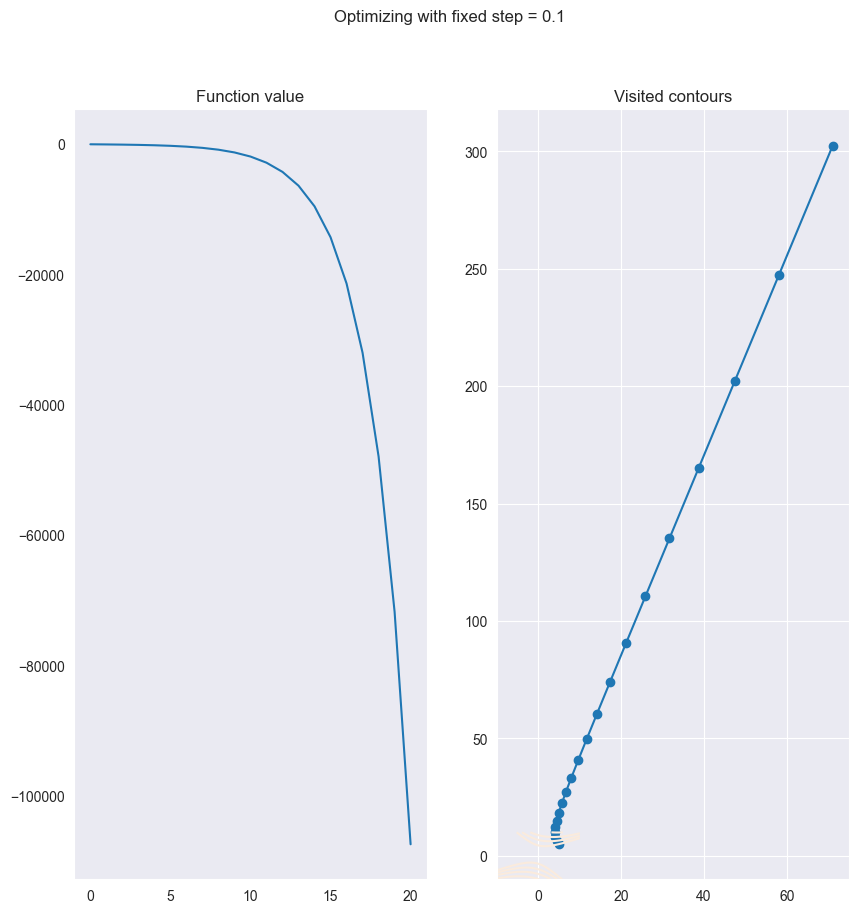

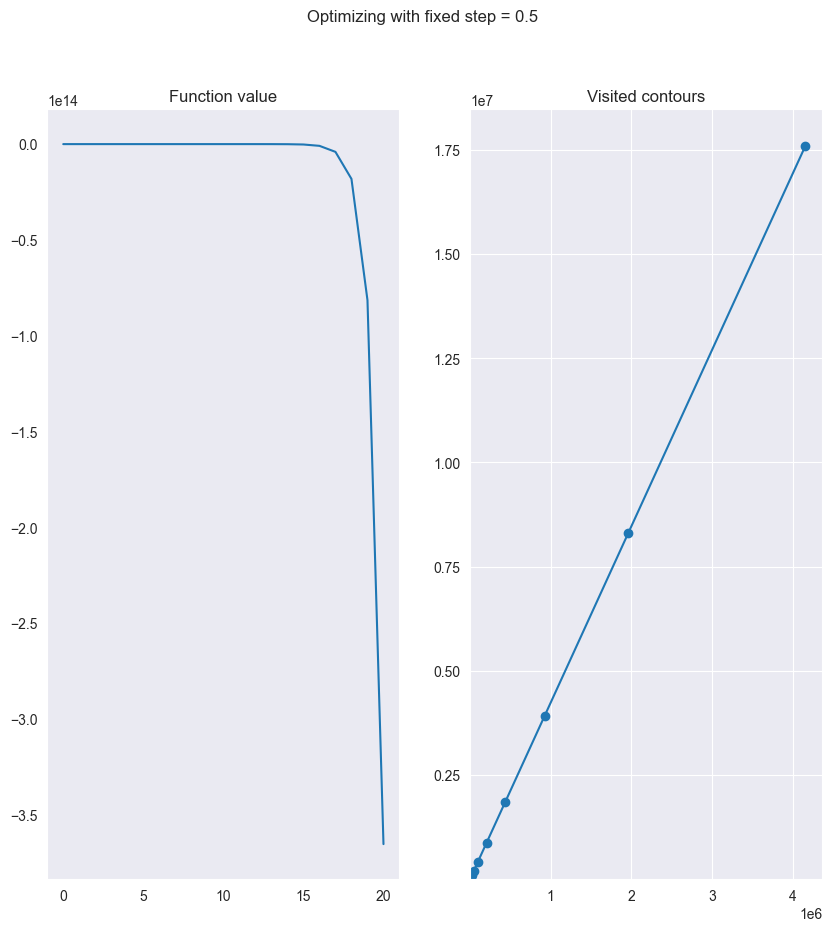

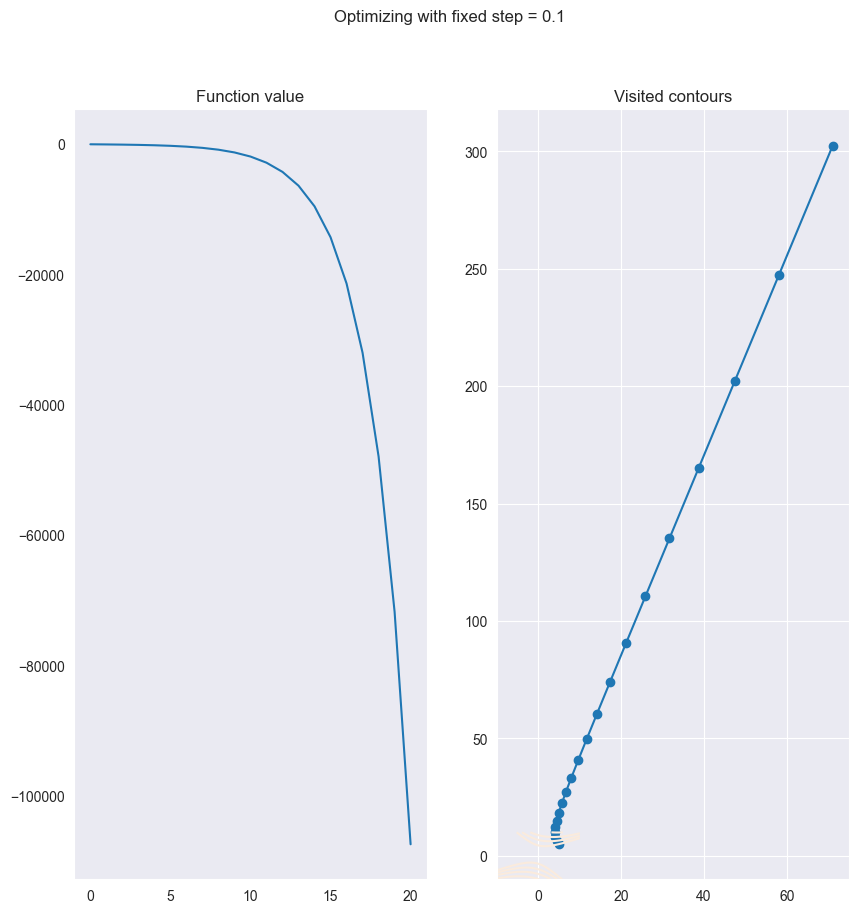

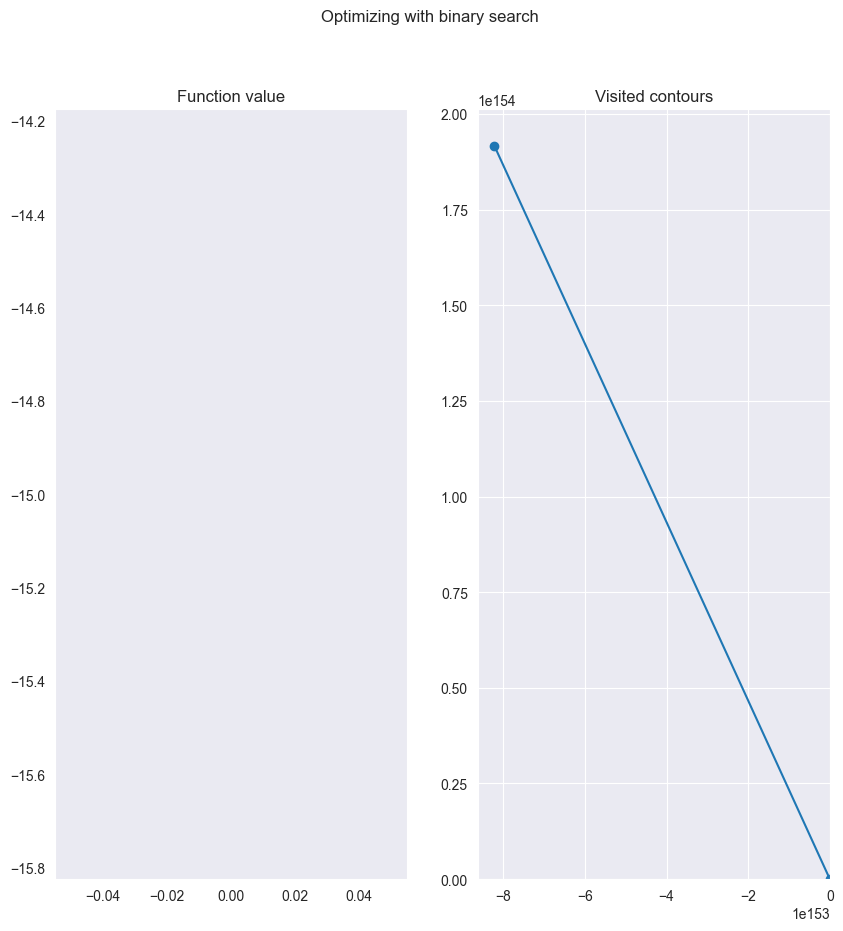

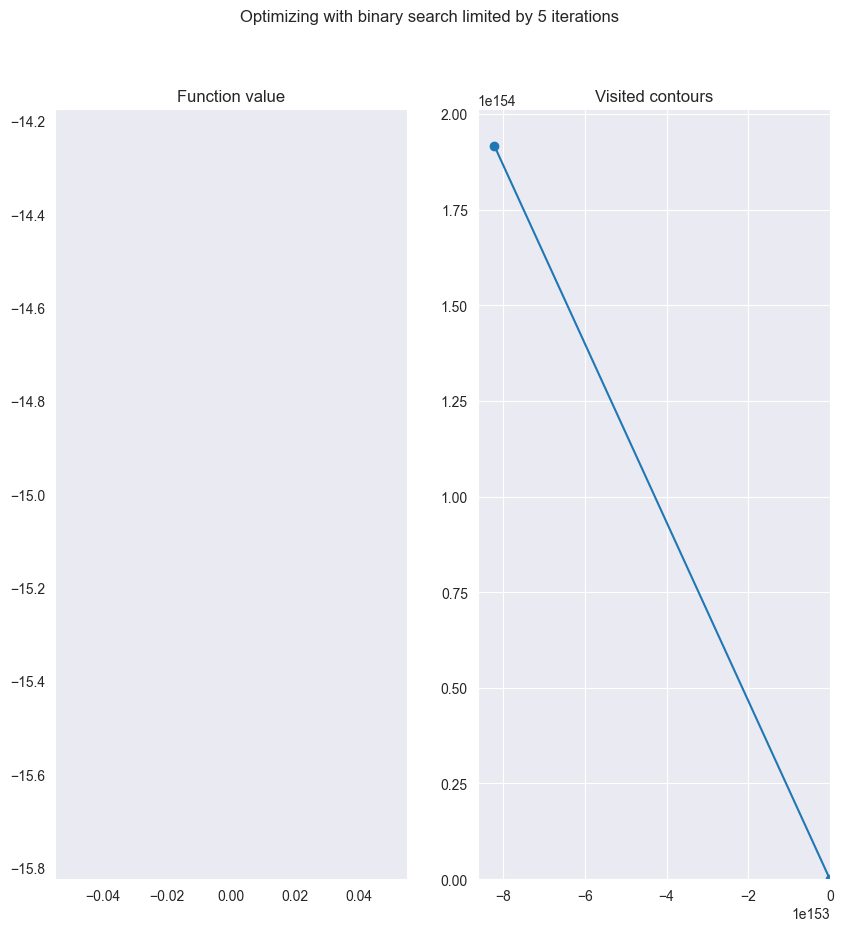

In [15]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.5, 0.1], x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=1, b=-1, c=-1, d=1, e=1
)

## Случай неопределенной формы.

У таких функций есть ровно 1 стационарная точка, но сама функция не ограничена, поэтому нет глобального минимума, а единственная стационарная точка
даже не является локальным минимумом.

На таком примере видно, что градиентный спуск сходится к стационарной точке, которая находится "ниже" остальных, но эта точка необязательно будет локальным минимумом.
Помимо этого, видно, что на таких функциях очень важно стартовое условие. Если стартовать со "склона", то метод за доступные шаги будет "скатываться" по склону, пока не
будет достигнуто терминально условия (в данном случае количество итераций просто ограничено).

Optimizing with fixed step = 0.1
Best value found: x* = [-0.43658932 -0.43658932] with f(x*) = -0.49195817062550123
Optimizing with fixed step = 0.5
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.5
Optimizing with fixed step = 1
Best value found: x* = [5 5] with f(x*) = 60
Optimizing with binary search
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.5
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.5
Optimizing with golden ration
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.49999999999999994
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [-0.50000001 -0.50000001] with f(x*) = -0.5
Optimizing with backtracking method
Best value found: x* = [-0.5 -0.5] with f(x*) = -0.5


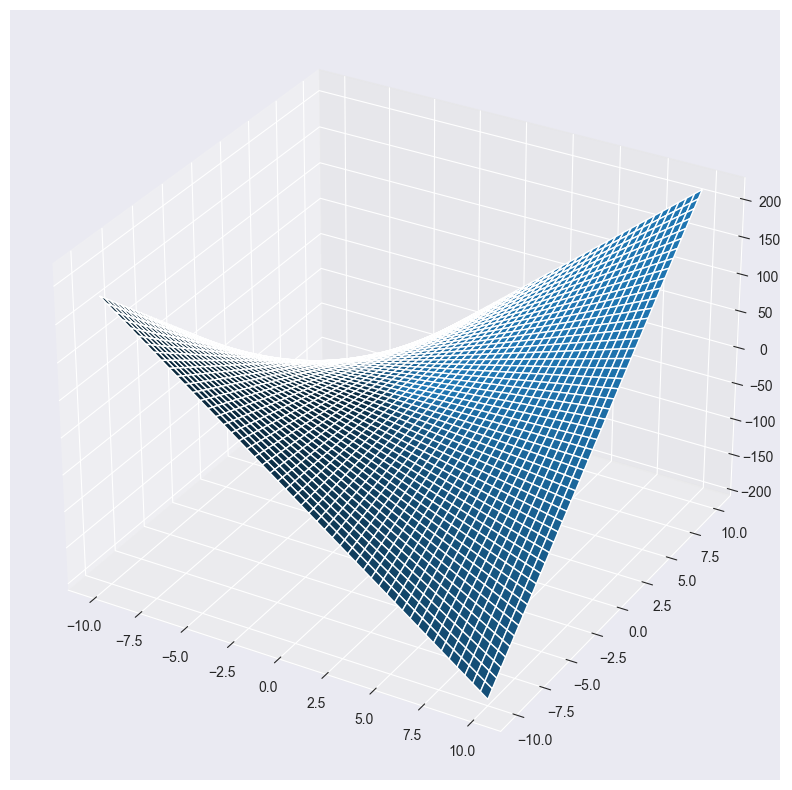

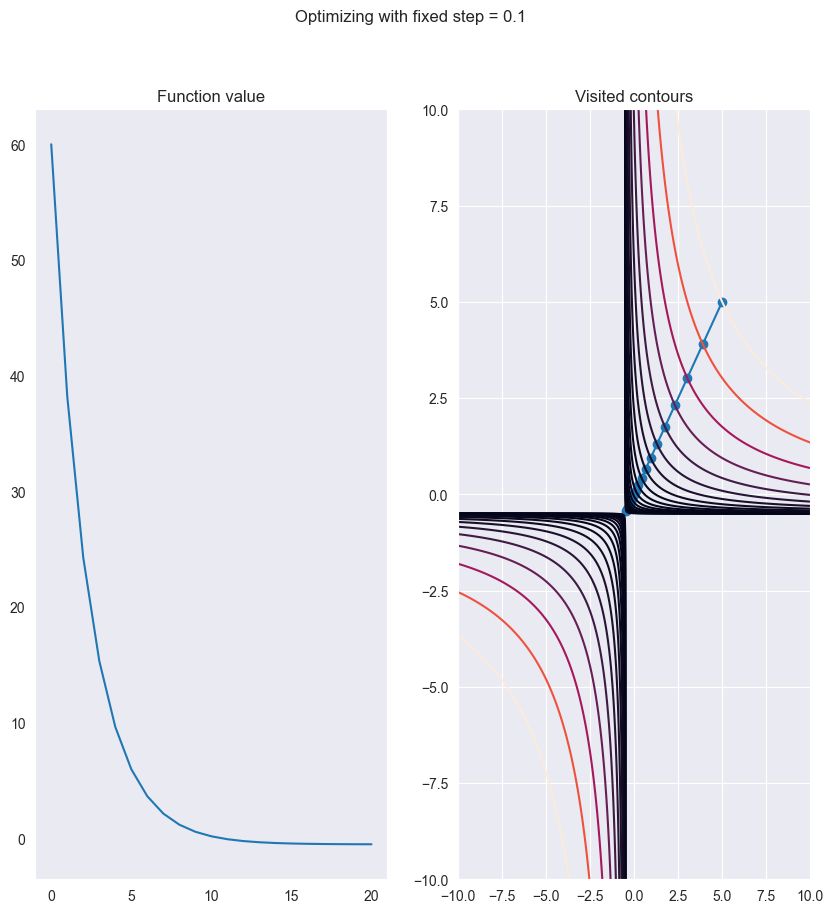

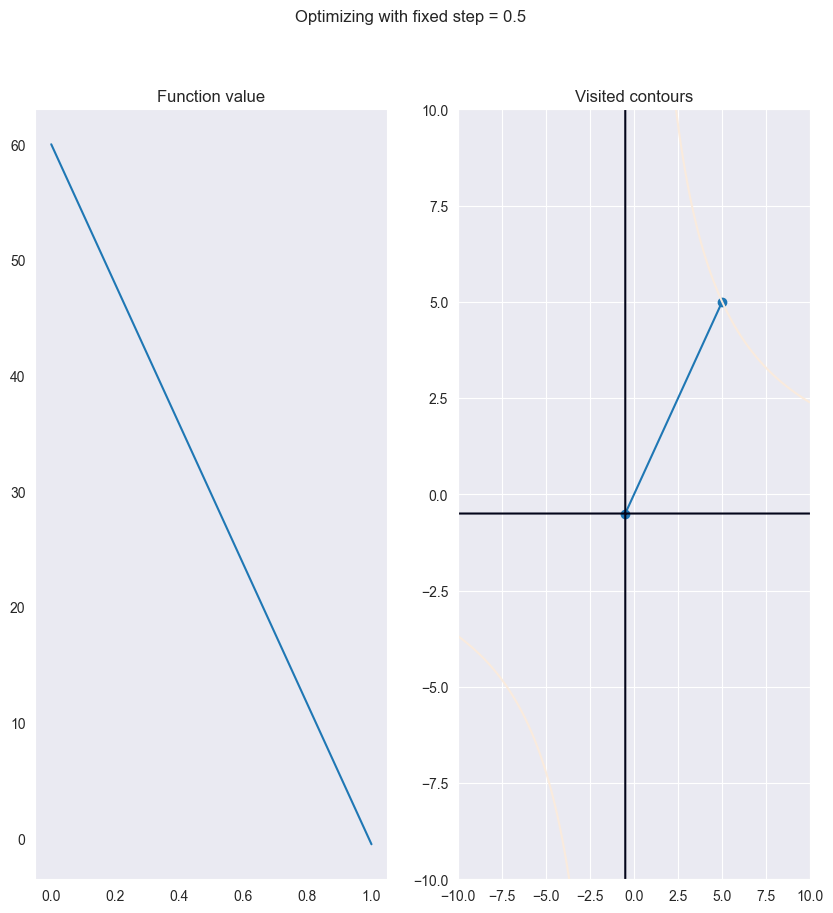

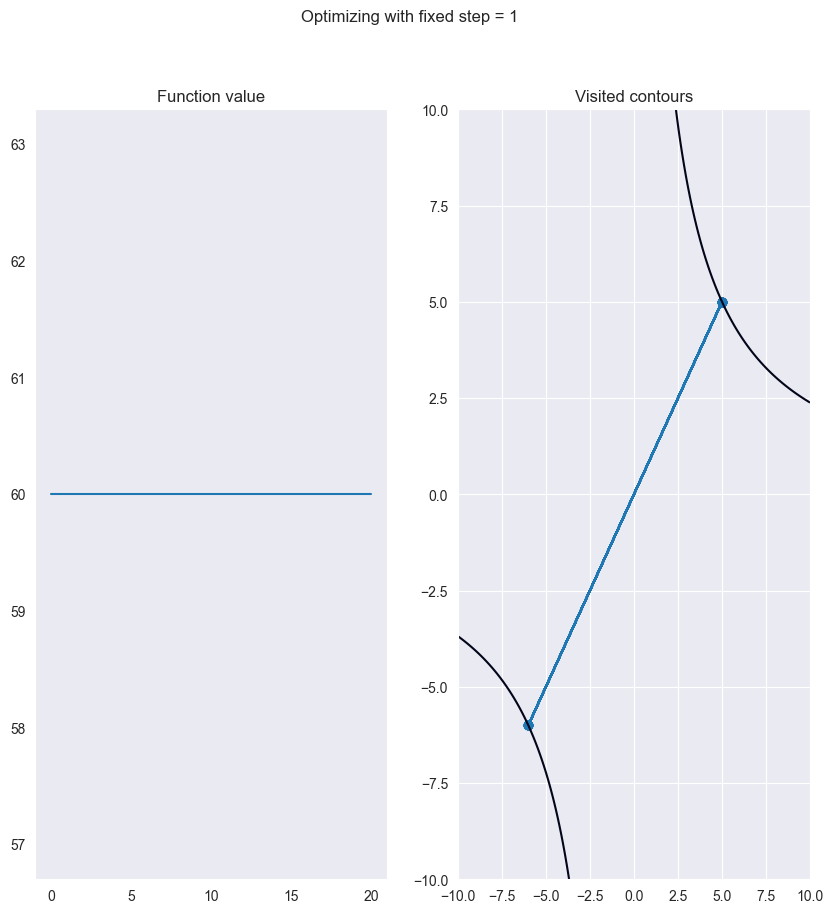

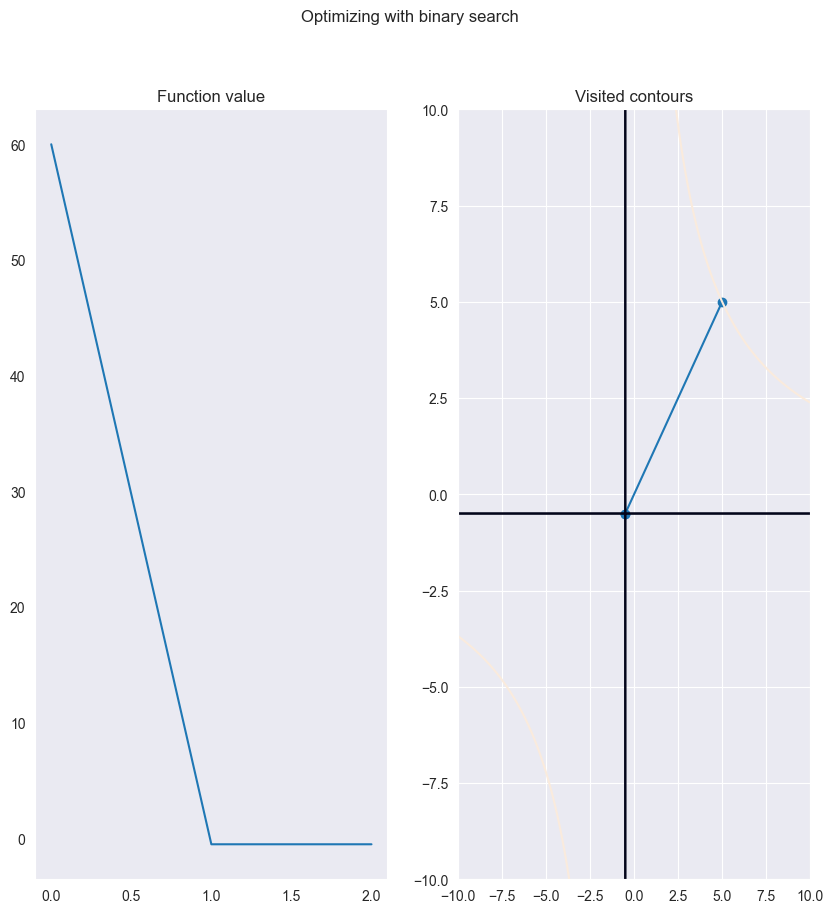

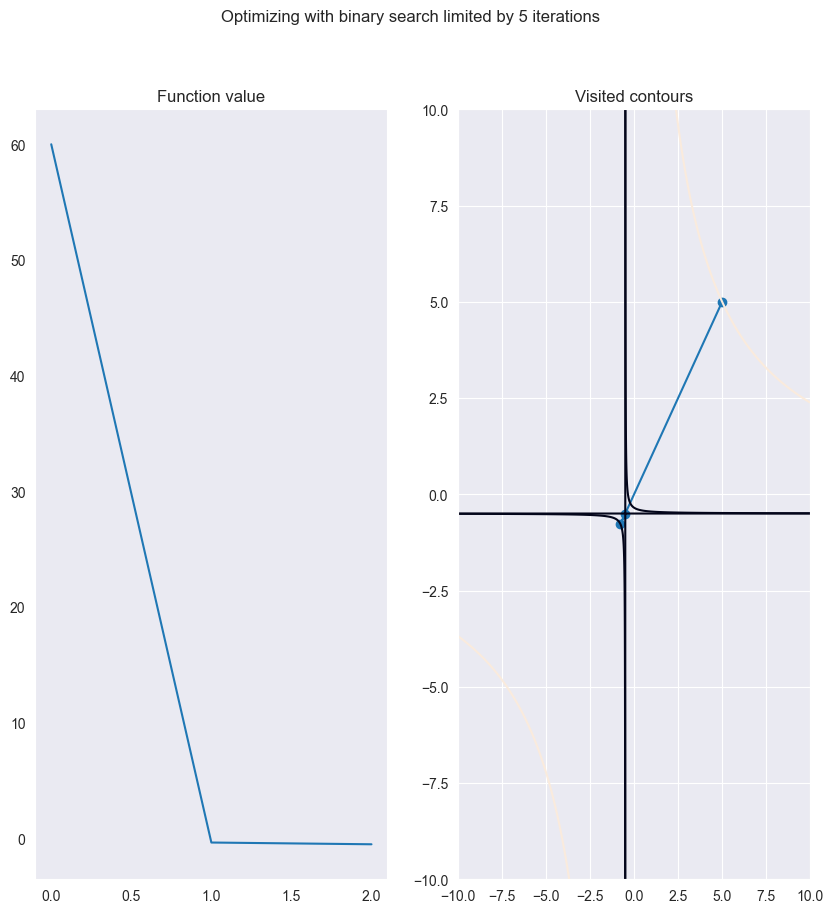

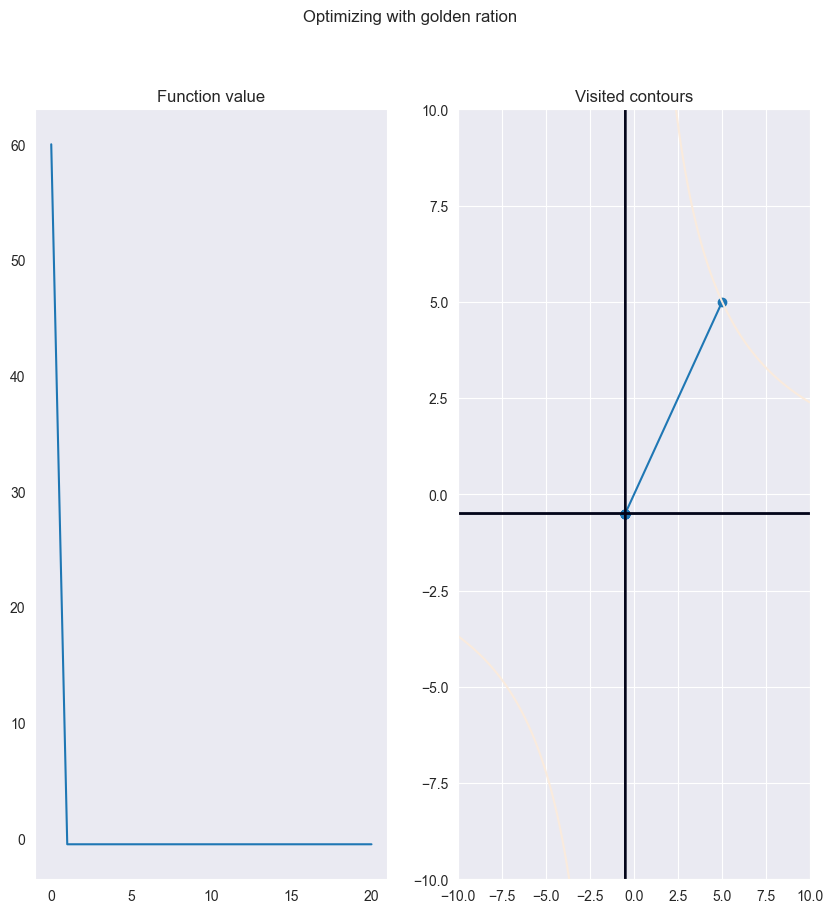

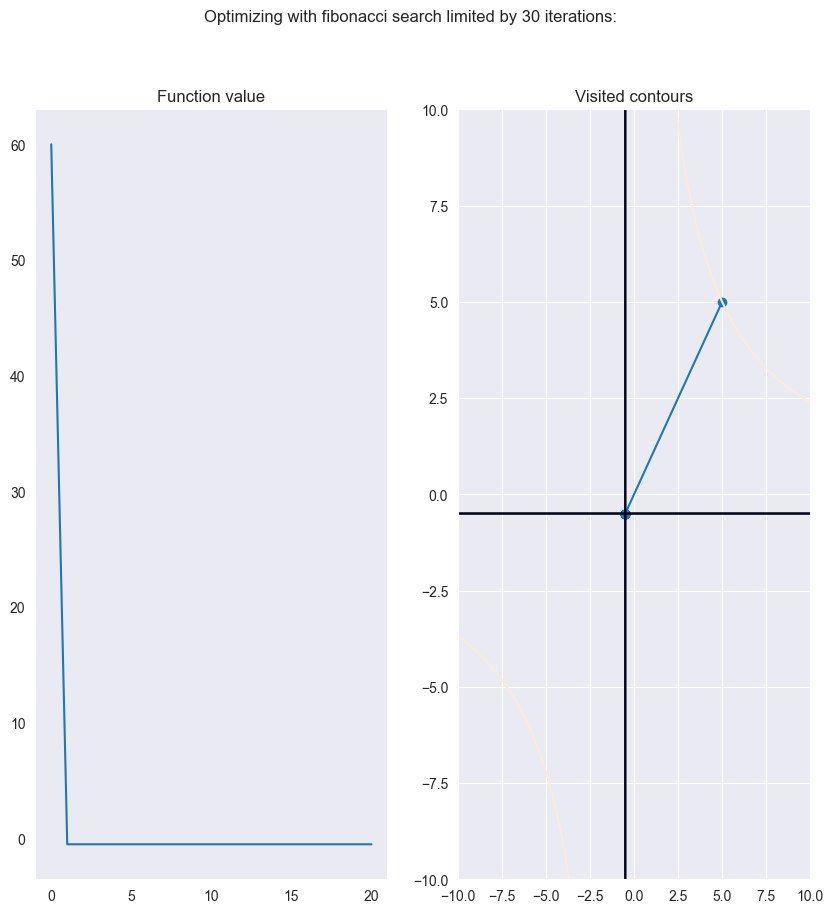

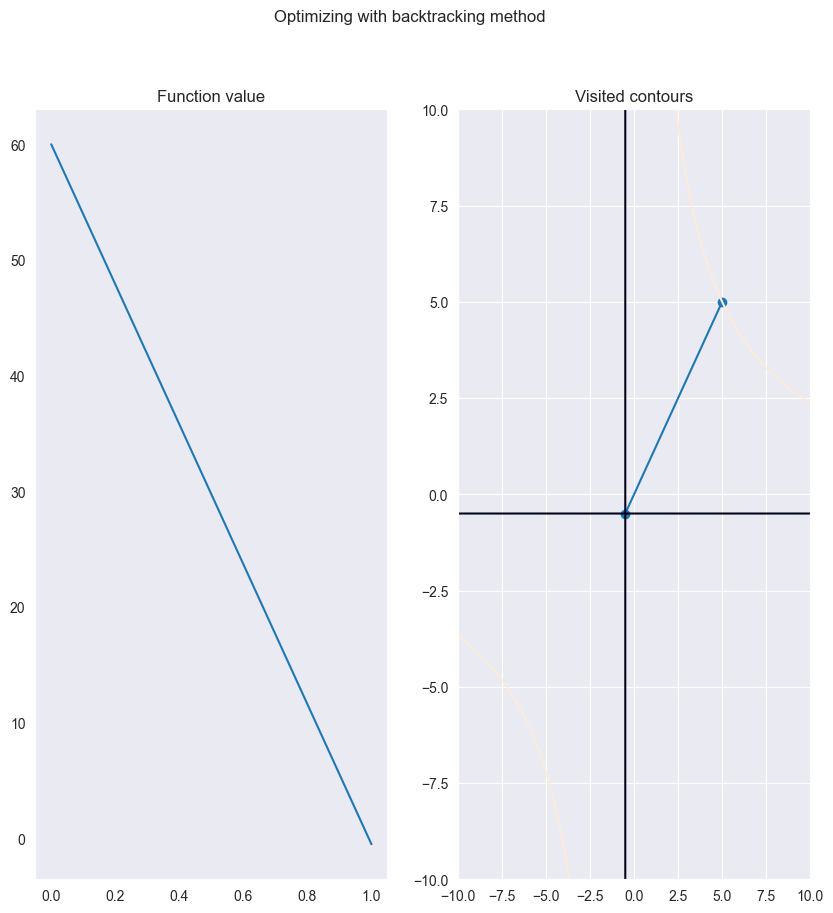

In [18]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.5, 1],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=0, b=2, c=0, d=1, e=1
)

Optimizing with fixed step = 0.1
Best value found: x* = [-192.18223501  191.19376423] with f(x*) = -73489.07833199302
Optimizing with fixed step = 0.5
Best value found: x* = [-5242880.5  5242879.5] with f(x*) = -54975581388800.5
Optimizing with fixed step = 1
Best value found: x* = [-254052821  254052821] with f(x*) = -138106482
Optimizing with binary search


C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:10: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: np.array([2 * a * x[0] + b * x[1] + d, 2 * c * x[1] + b * x[0] + e])
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow encountered in scalar power
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return lambda x: a * x[0] ** 2 + b * x[0] * x[1] + c * x[1] ** 2 + d * x[0] + e * x[1]
C:\Users\Ilya\DataSpellProjects\GradientDescent\core\quadratic_analyzer.py:6: RuntimeWarning: overflow enc

Best value found: x* = [-1.50633838e+154  1.23245867e+154] with f(x*) = nan
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-1.50633838e+154  1.23245867e+154] with f(x*) = nan
Optimizing with golden ration


KeyboardInterrupt: 

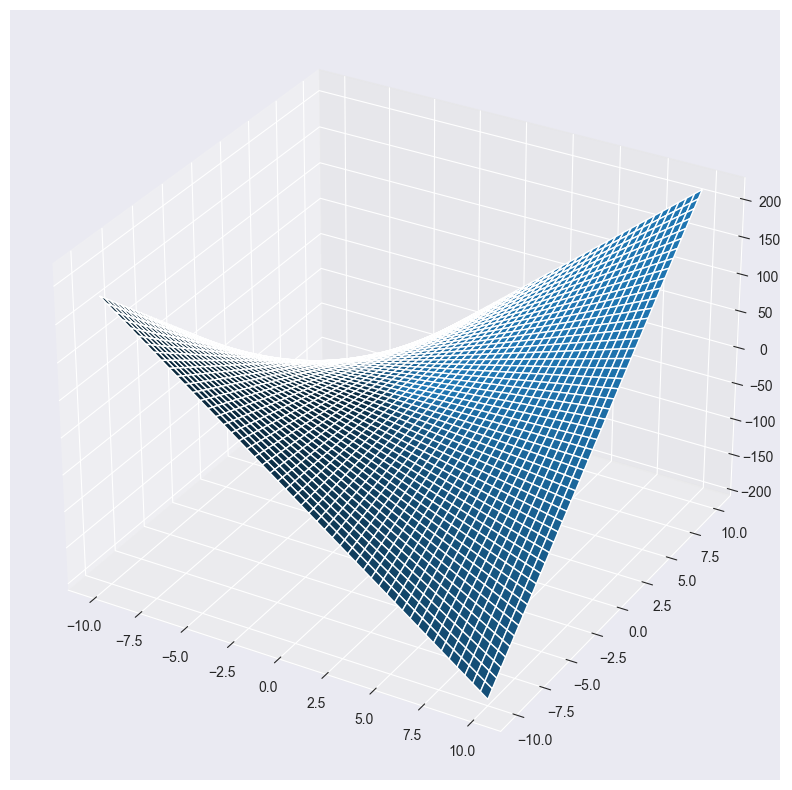

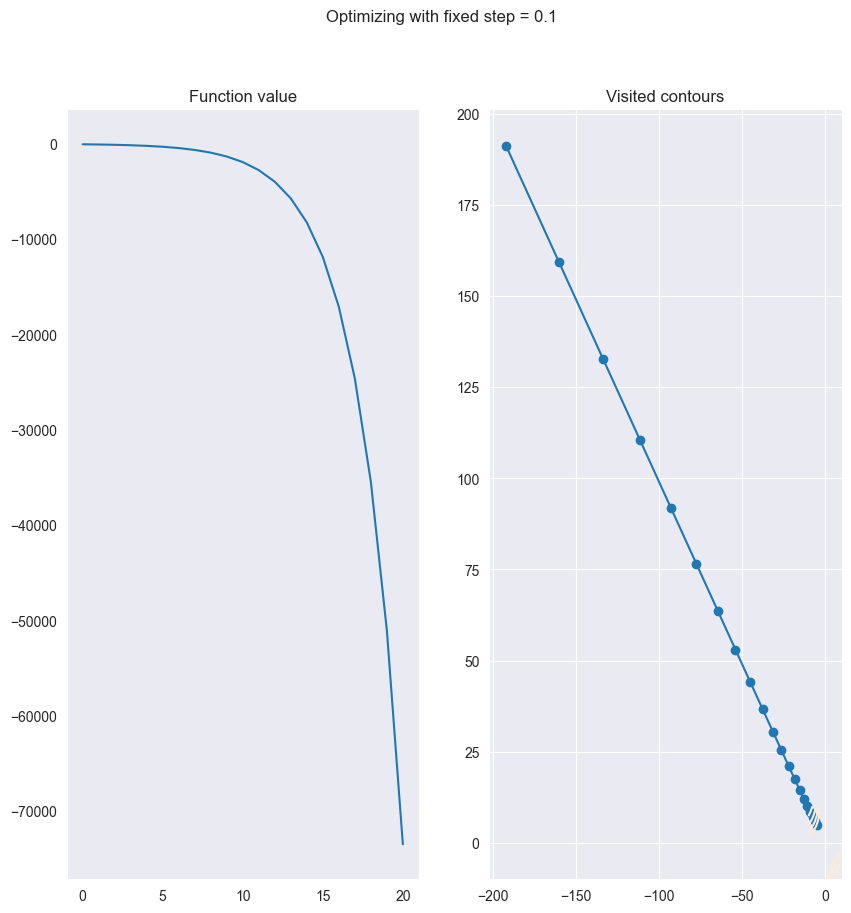

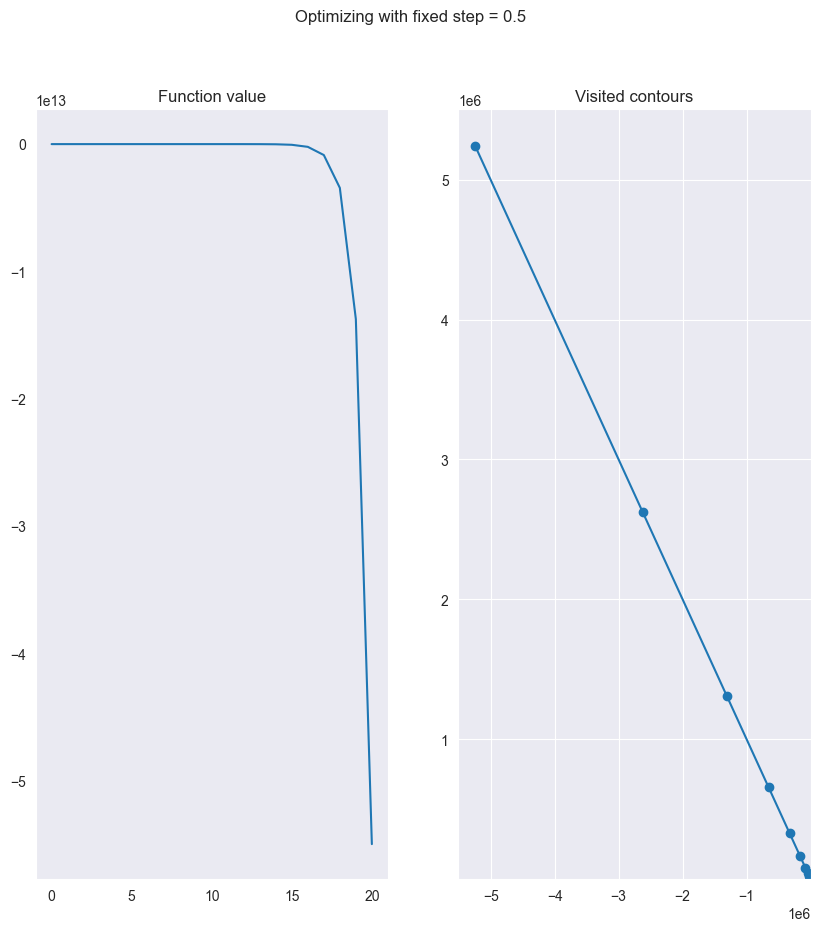

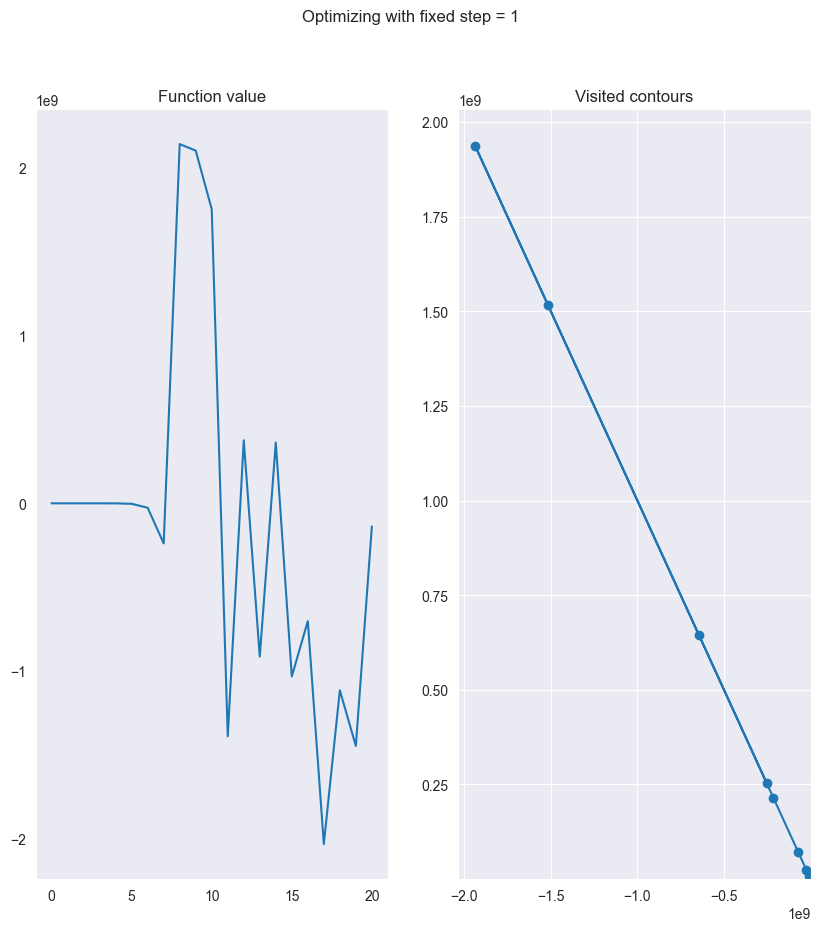

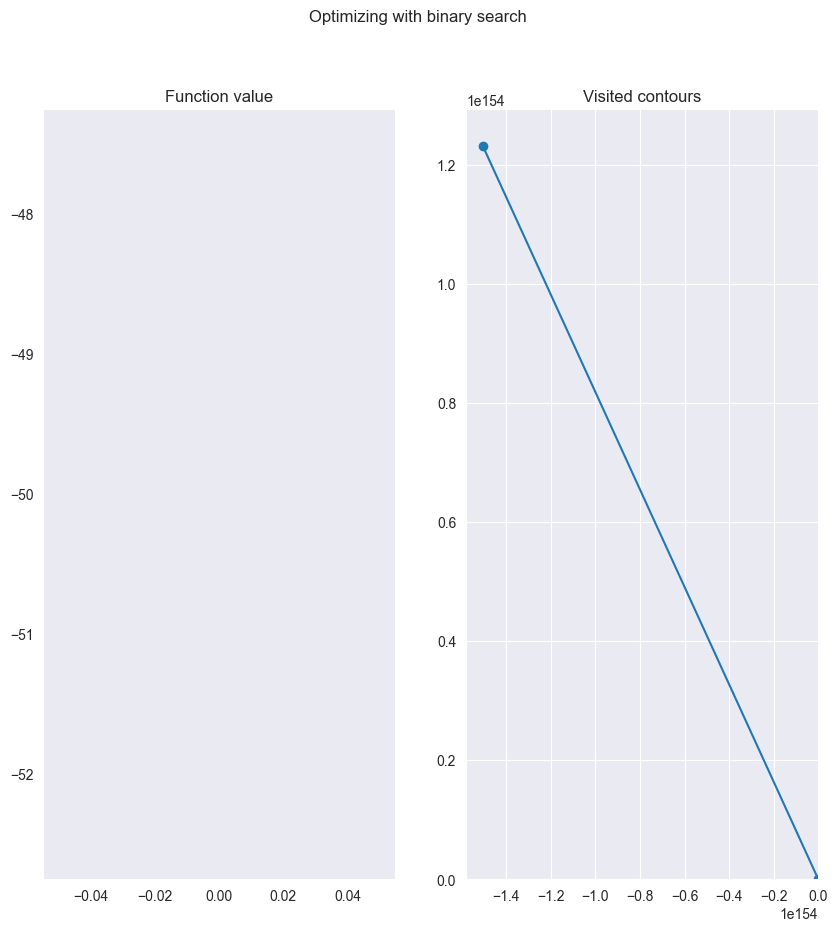

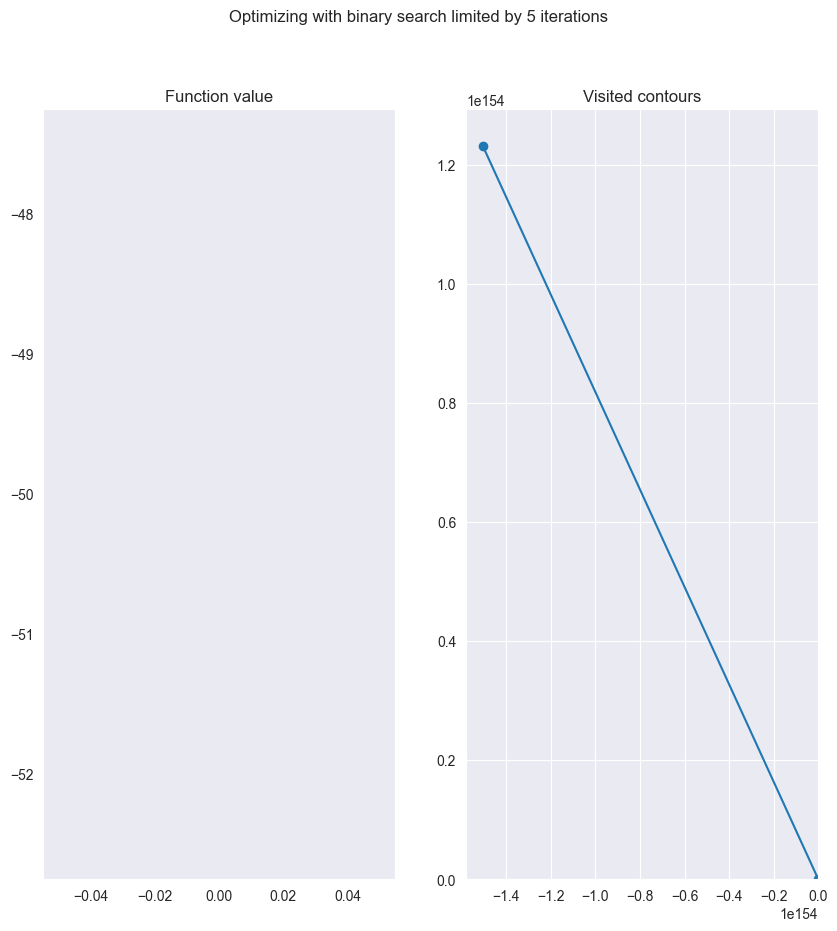

In [19]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.5, 1],
    x0=np.array([-5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=0, b=2, c=0, d=1, e=1
)

## Случай параболы в сечении

У функции нет глобального минимума, но есть направление для убывания. В виду метод будет сходиться, кроме случая слишком большого шага.

Optimizing with fixed step = 0.1
Best value found: x* = [1.00000000e+00 5.49755814e-08] with f(x*) = 2.0000000000000044
Optimizing with fixed step = 0.5
Best value found: x* = [-1.50000e+01  5.24288e+06] with f(x*) = 82463372083170.0
Optimizing with fixed step = 1
Best value found: x* = [       -35 1299066613] with f(x*) = 1333453605
Optimizing with binary search
Best value found: x* = [-711.49126962    4.76101372] with f(x*) = -1354.9807841820727
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-8.725       0.33909966] with f(x*) = -17.105034265881983
Optimizing with golden ration
Best value found: x* = [-704.37837089    4.71149377] with f(x*) = -1342.1622211546753
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [-743.81980289    4.95058884] with f(x*) = -1414.1146160760961
Optimizing with backtracking method
Best value found: x* = [-9.      0.3125] with f(x*) = -17.70703125


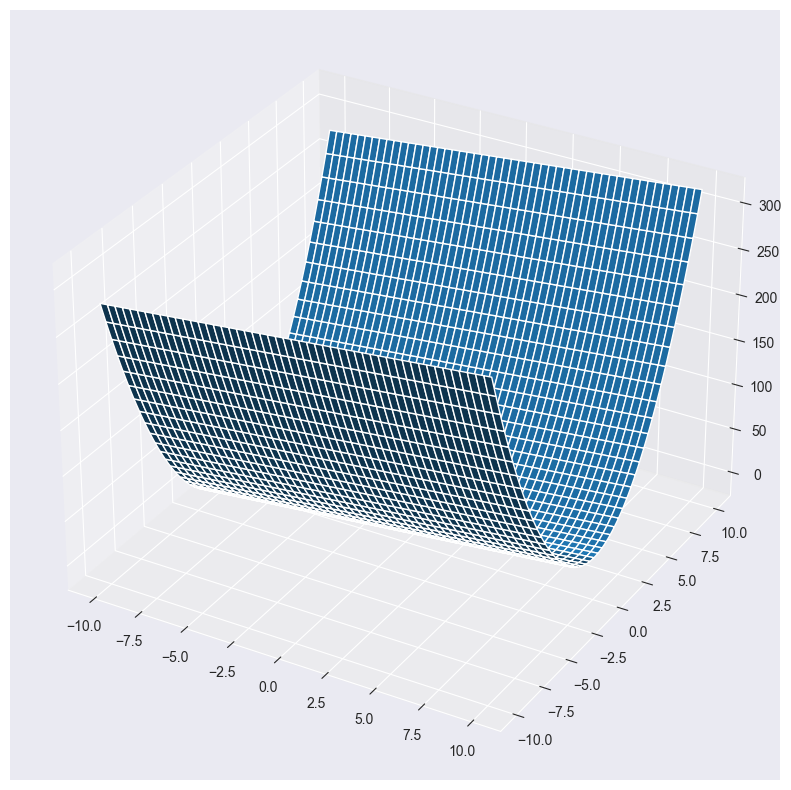

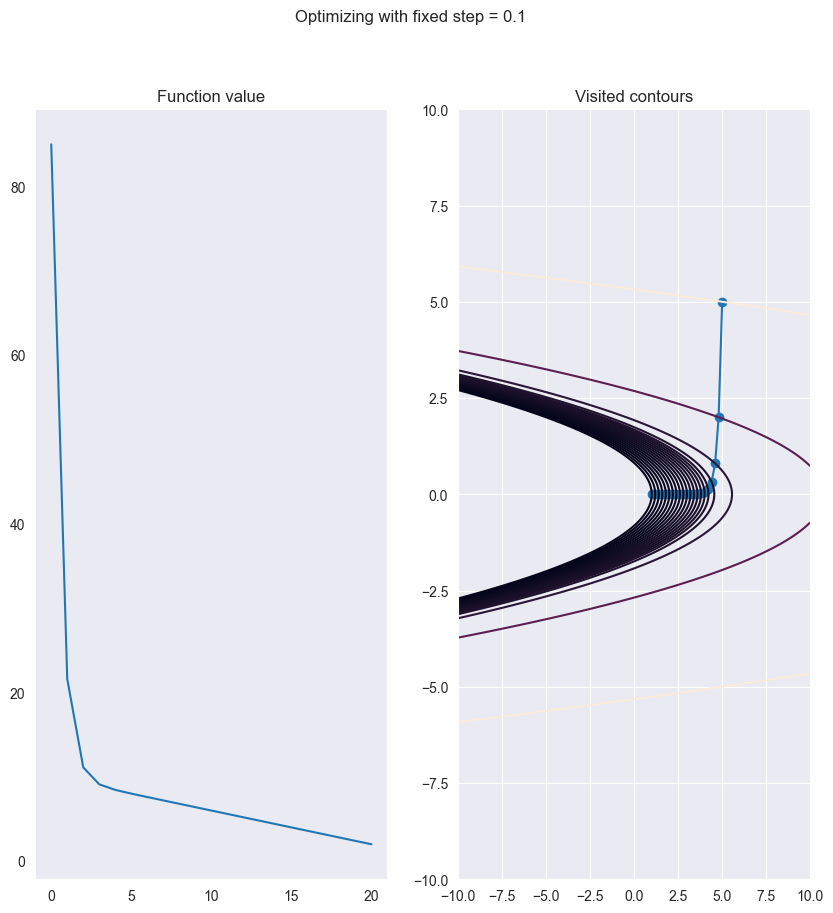

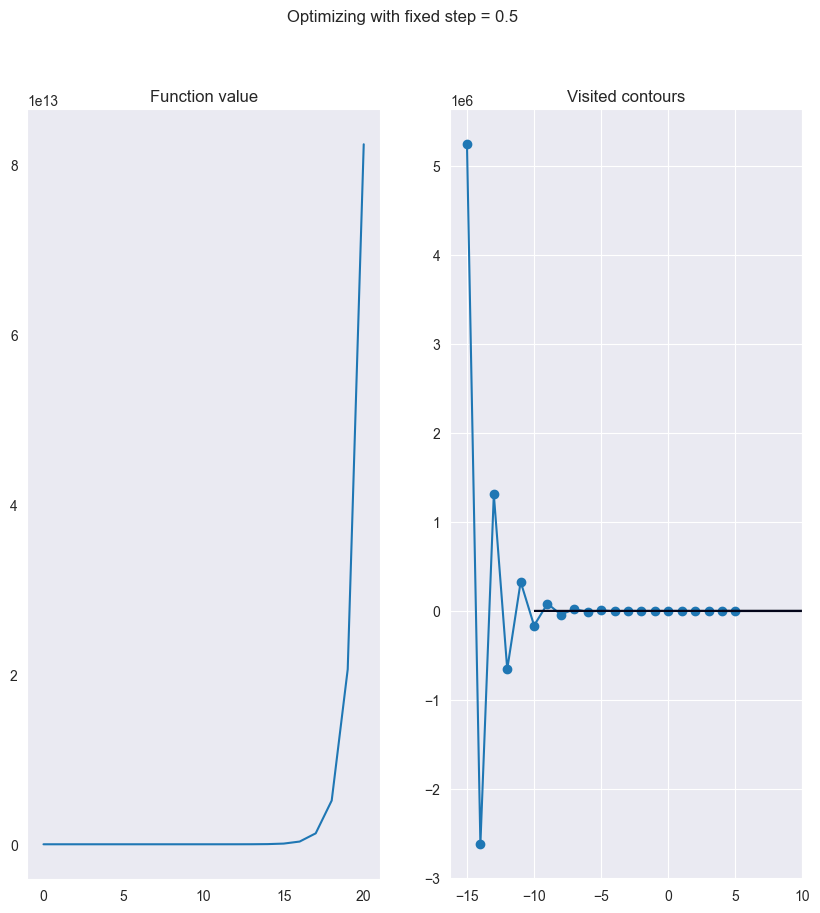

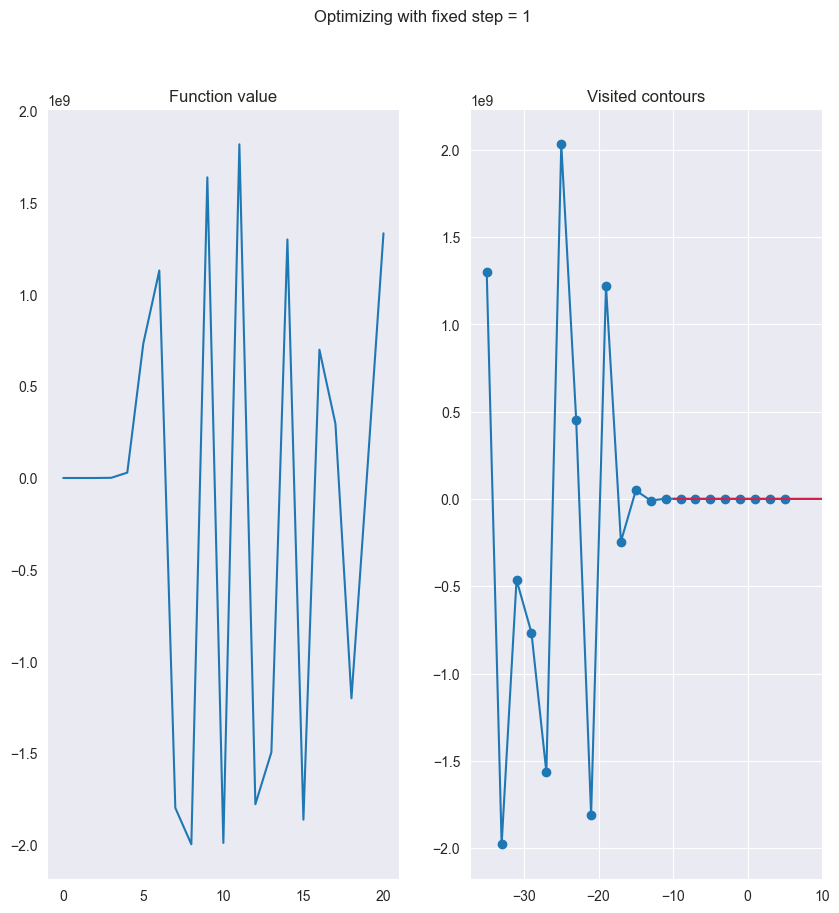

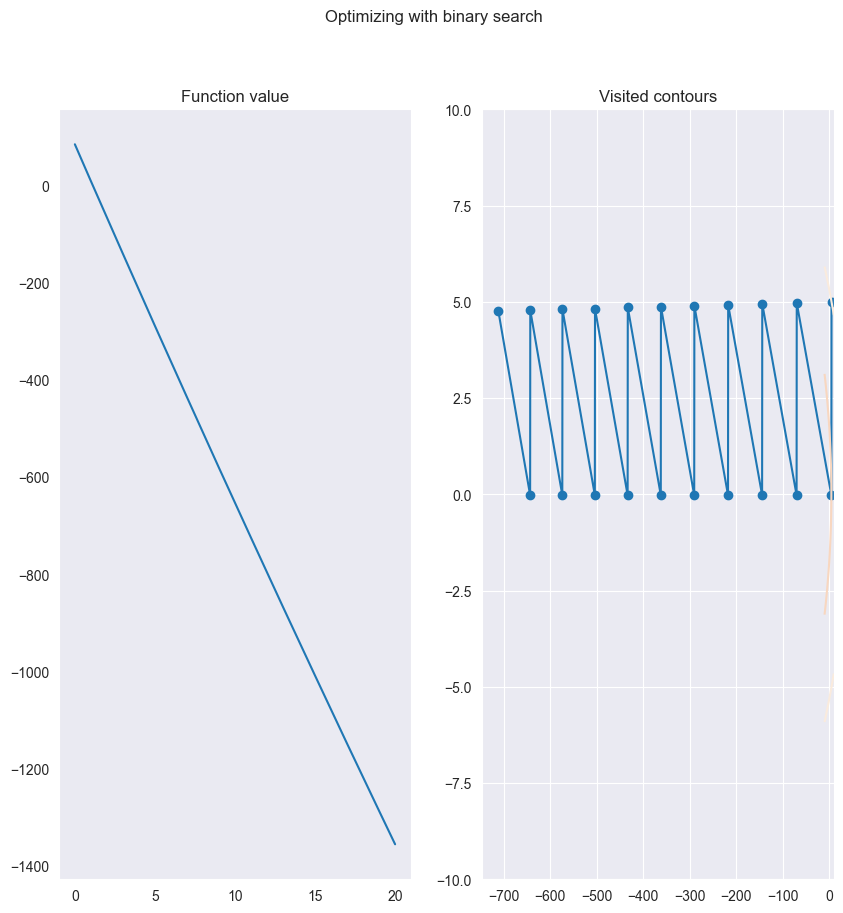

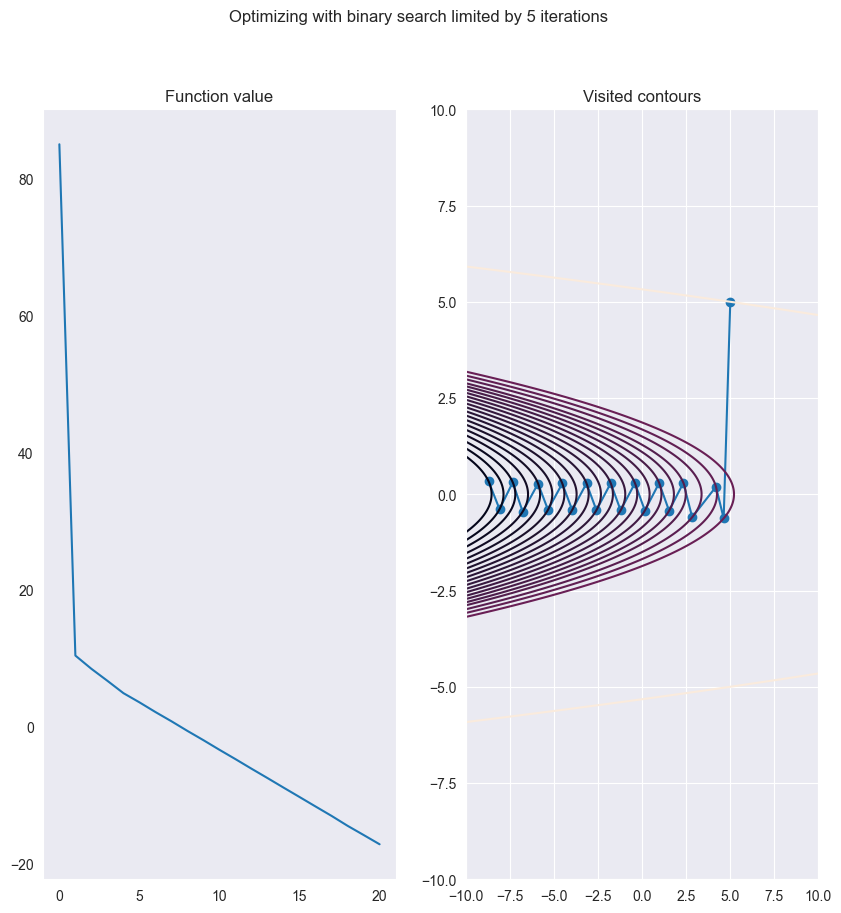

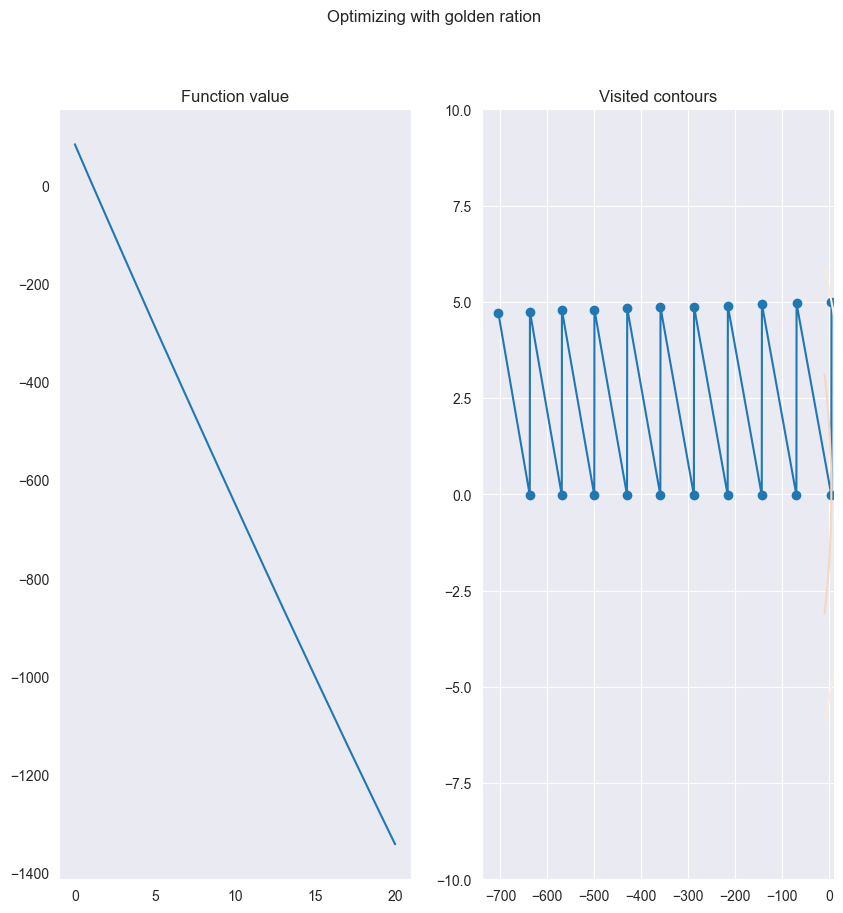

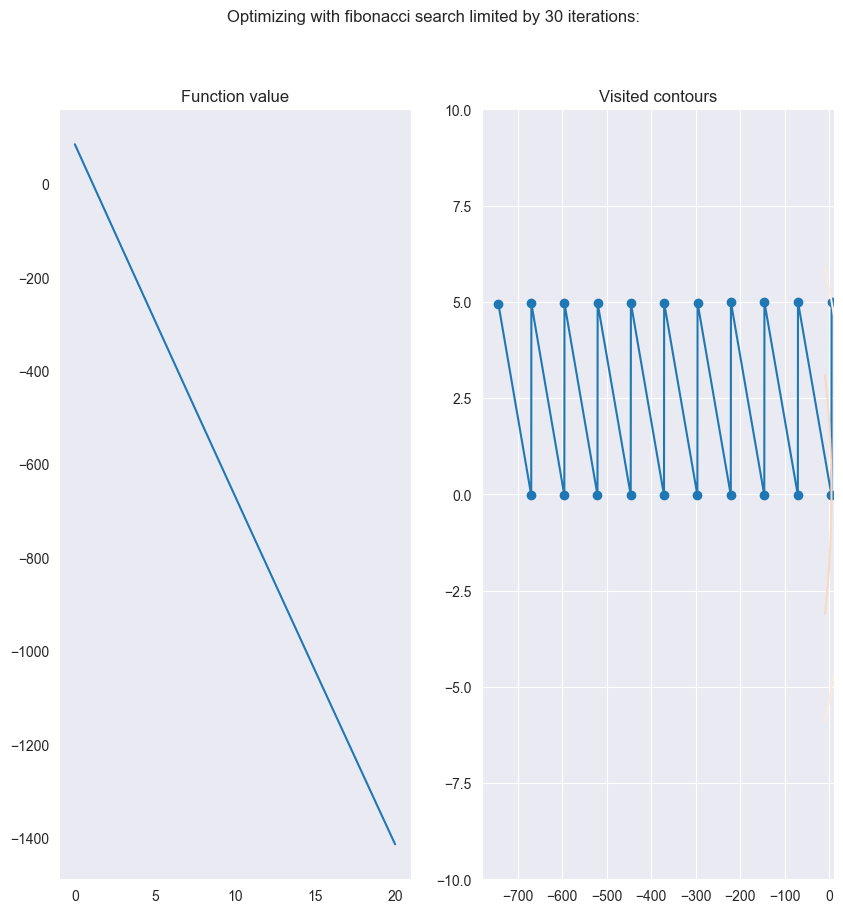

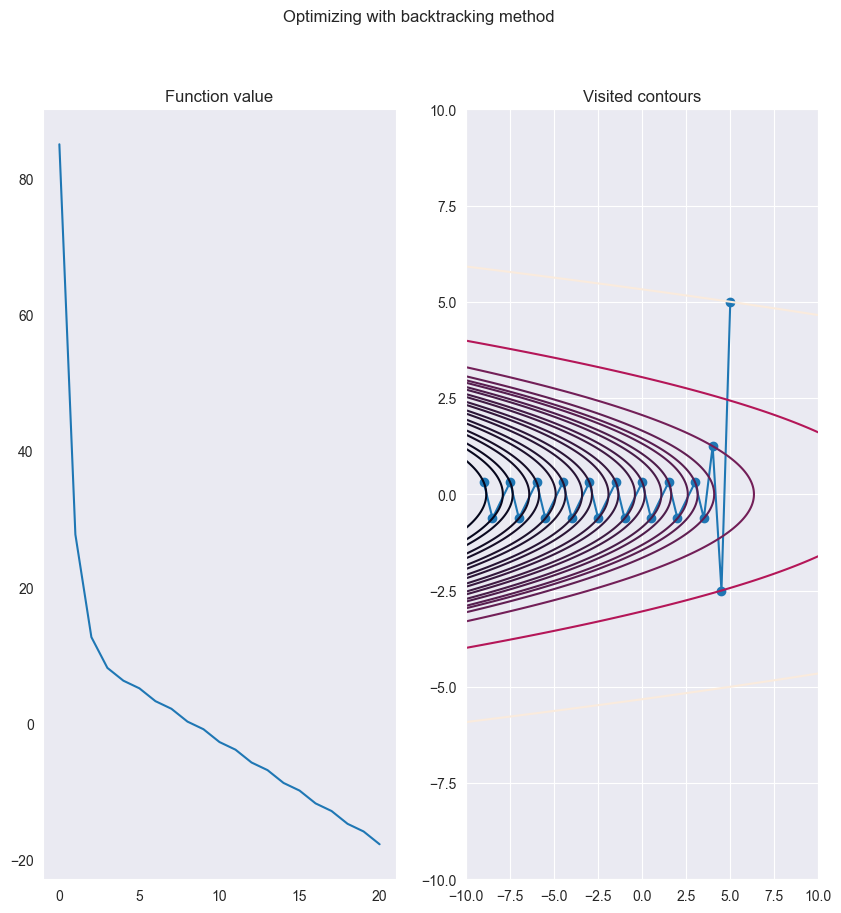

In [20]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.5, 1], x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=0, b=0, c=3, d=2, e=0
)

## Анализ преобразований над квадратичными формами

Возможные преобразования:
1. Добавление константы -- минимум меняется на ту же константу, траектория поиска никак не меняется.
2. Сдвиг координат -- траектория не меняется.
3. Равномерное растяжение координат -- траектория не меняется.
4. Неравномерное растяжение координат -- траектория не меняется.

## Сдвиг координат

Optimizing with fixed step = 0.1
Best value found: x* = [-0.49711764 -0.00288225] with f(x*) = -0.49998338465003267
Optimizing with fixed step = 0.3
Best value found: x* = [-0.43947162  0.06052838] with f(x*) = -0.4780178920197069
Optimizing with binary search
Best value found: x* = [-5.00000000e-01 -2.77555548e-17] with f(x*) = -0.5
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-0.49949932  0.00050068] with f(x*) = -0.49999849592313694
Optimizing with golden ration
Best value found: x* = [-4.99999997e-01  2.89464995e-09] with f(x*) = -0.4999999999999999
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [-5.00000000e-01  8.32077423e-11] with f(x*) = -0.49999999999999994
Optimizing with backtracking method
Best value found: x* = [-4.99994755e-01  4.76837158e-06] with f(x*) = -0.4999999998494786


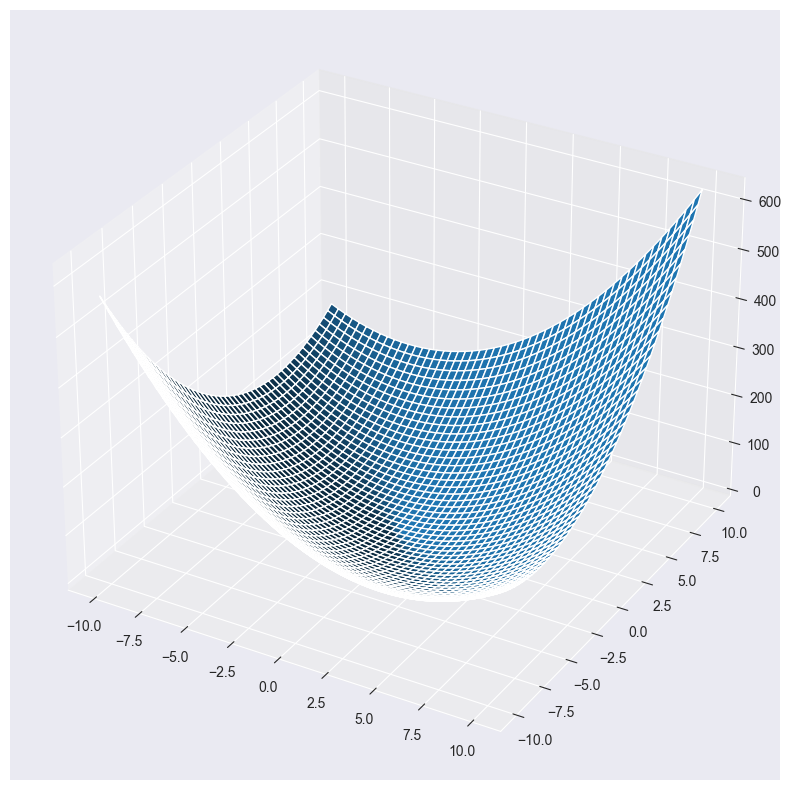

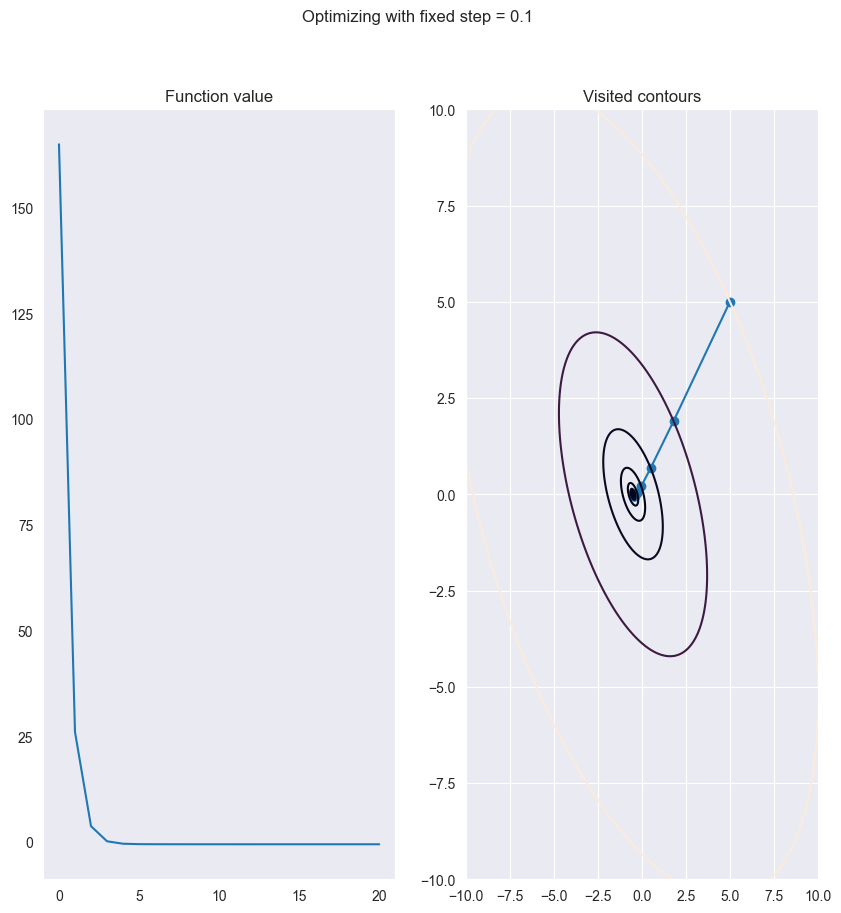

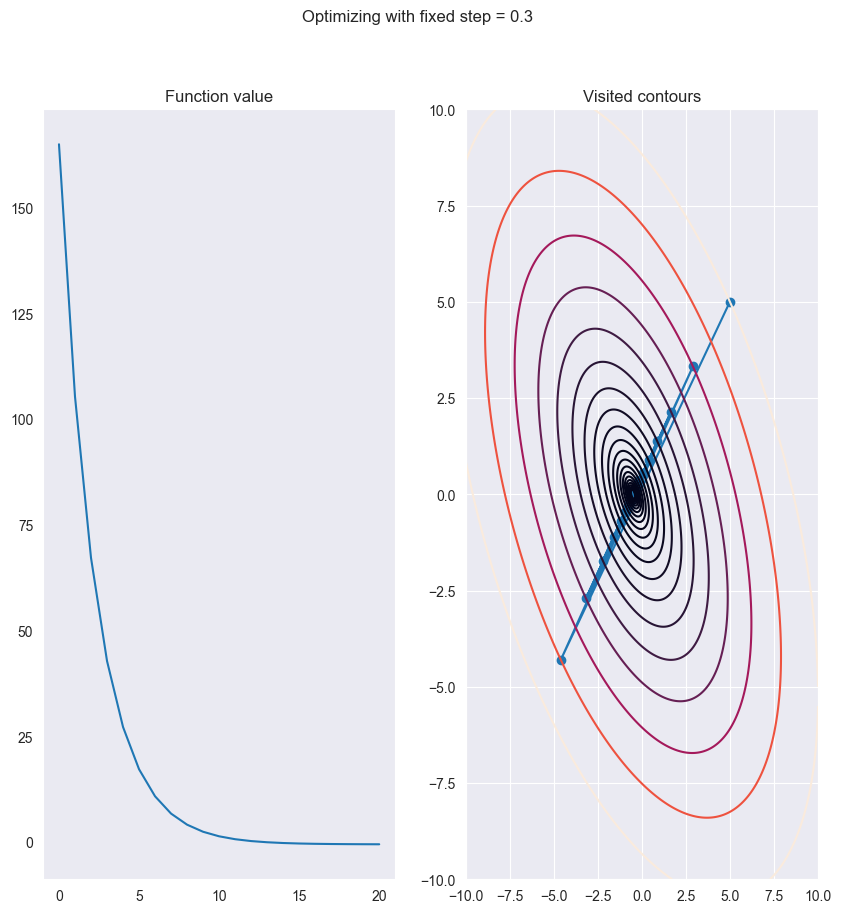

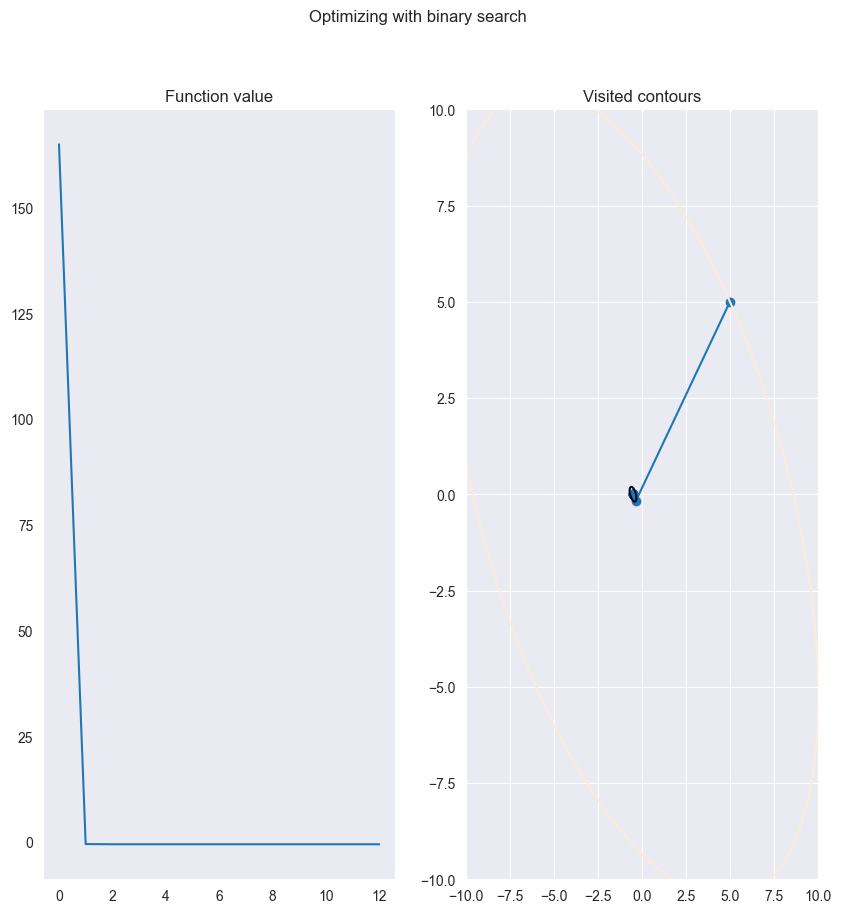

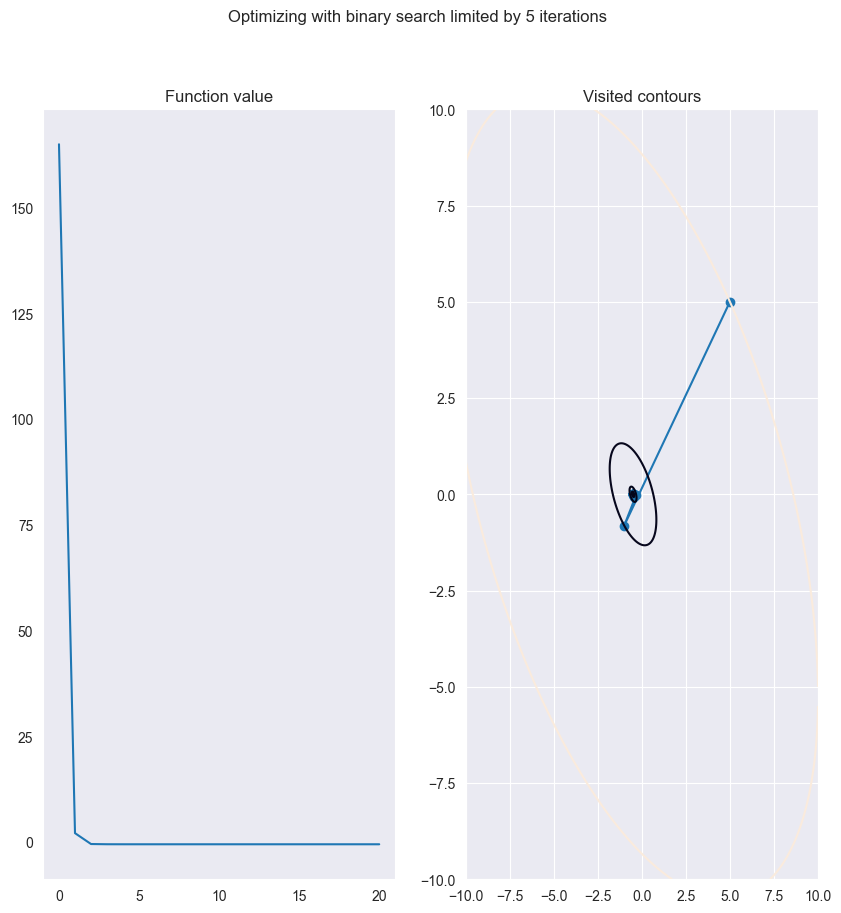

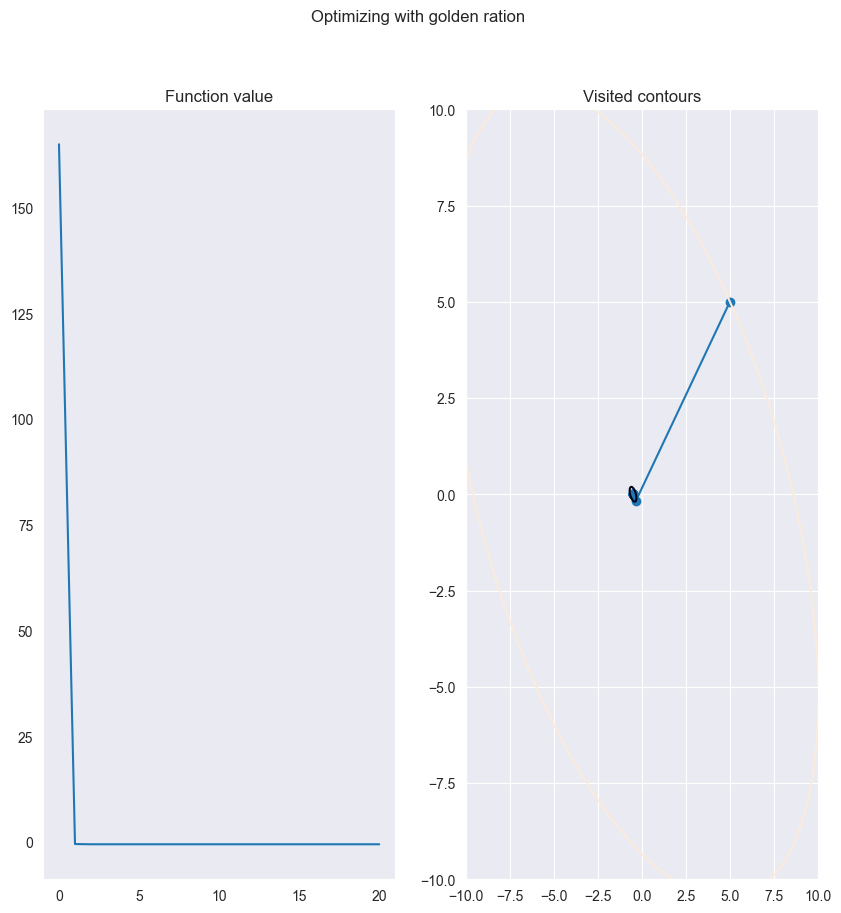

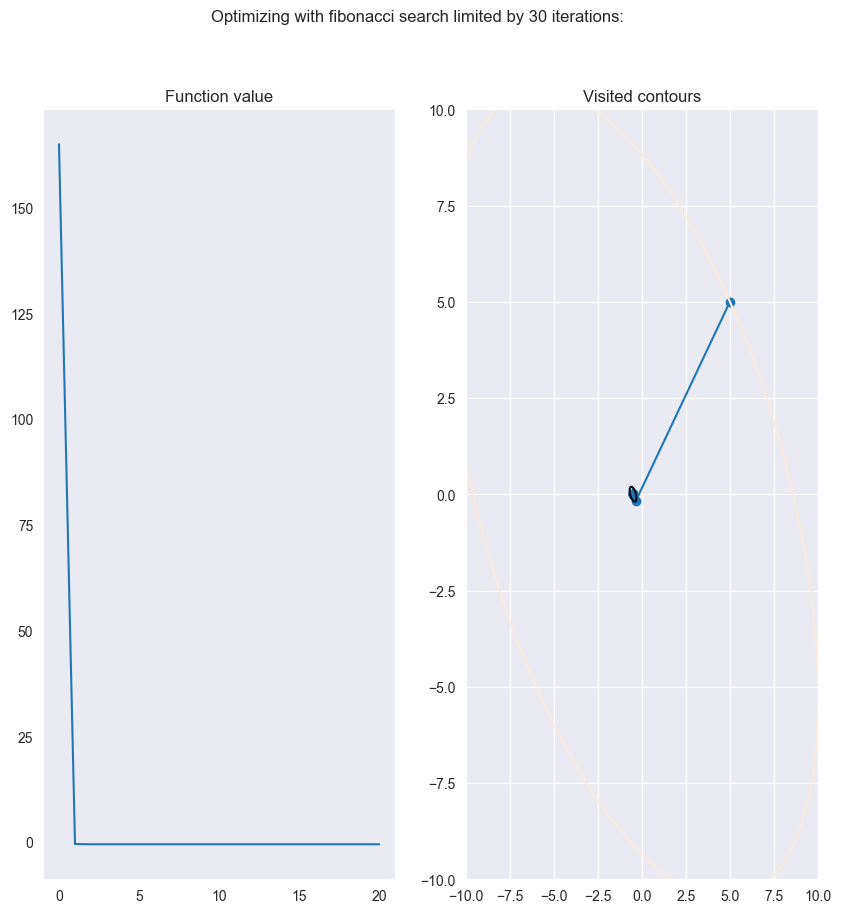

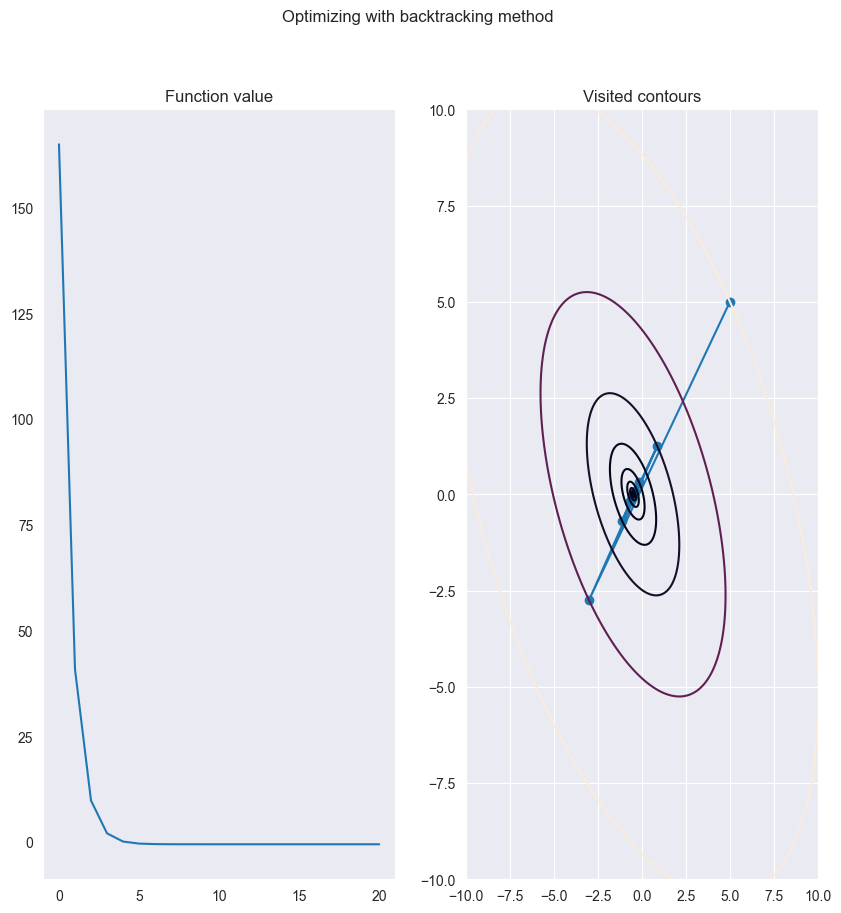

In [21]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.3],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=2, b=2, c=2, d=2, e=1
)

Optimizing with fixed step = 0.1
Best value found: x* = [5.49755814e-08 5.49755814e-08] with f(x*) = 1.813388729421935e-14
Optimizing with fixed step = 0.3
Best value found: x* = [0.05764608 0.05764608] with f(x*) = 0.0199384199367737
Optimizing with binary search
Best value found: x* = [2.45454673e-90 2.45454673e-90] with f(x*) = 3.614879797654326e-179
Optimizing with binary search limited by 5 iterations
Best value found: x* = [0.00047684 0.00047684] with f(x*) = 1.3642420526593924e-06
Optimizing with golden ration
Best value found: x* = [4.06239217e-98 4.06239217e-98] with f(x*) = 9.901818100106845e-195
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [1.24661739e-108 1.24661739e-108] with f(x*) = 9.324329444344603e-216
Optimizing with backtracking method
Best value found: x* = [4.76837158e-06 4.76837158e-06] with f(x*) = 1.3642420526593924e-10


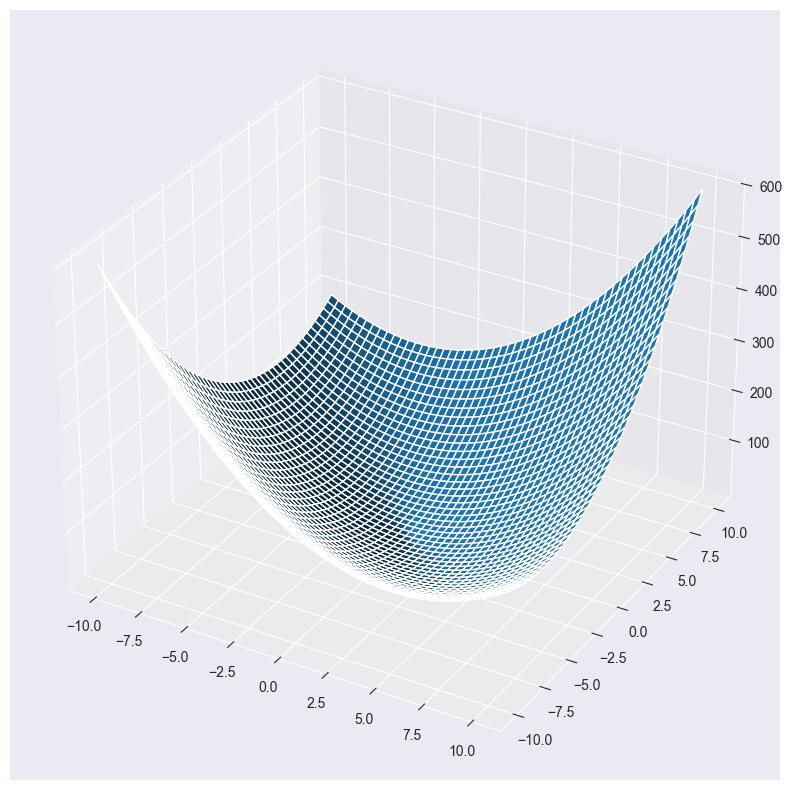

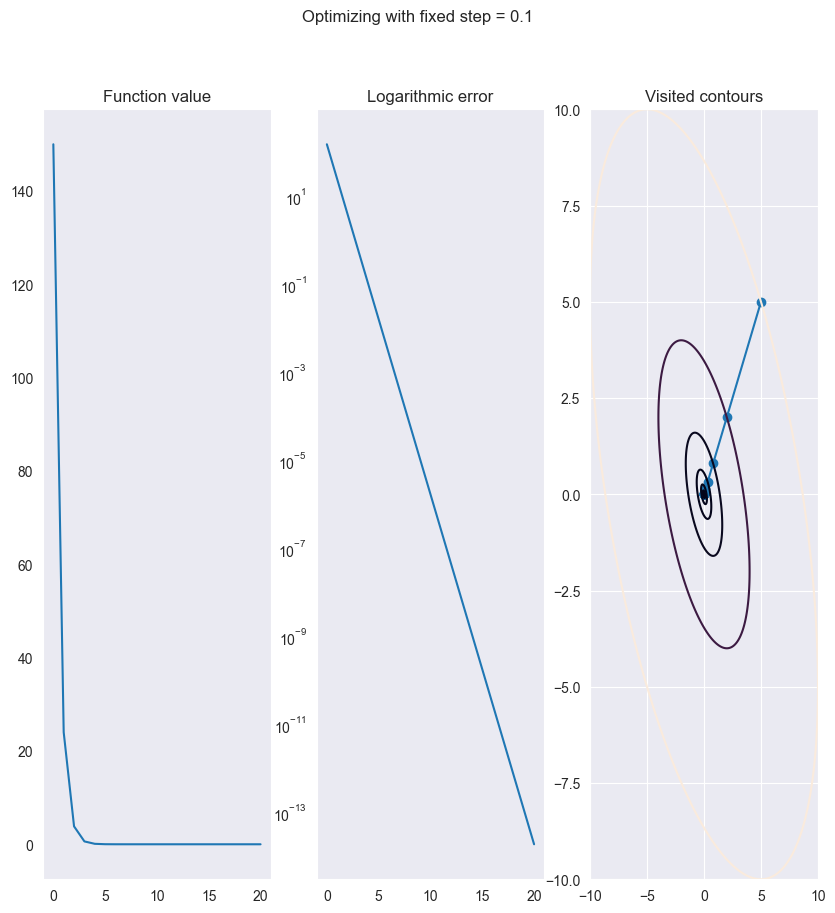

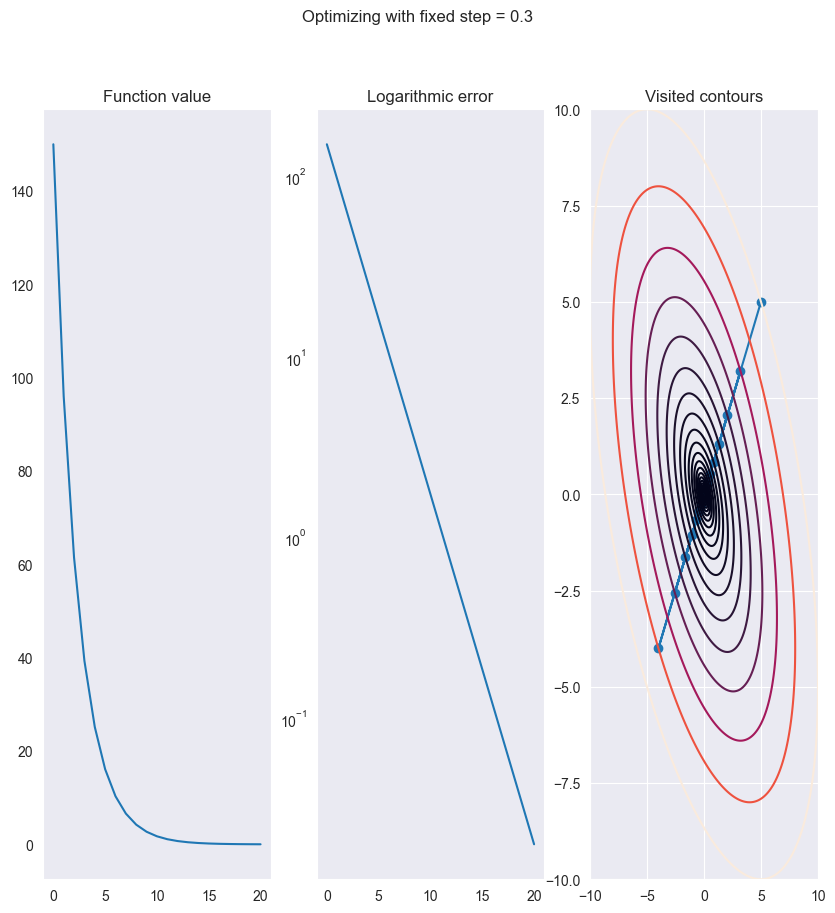

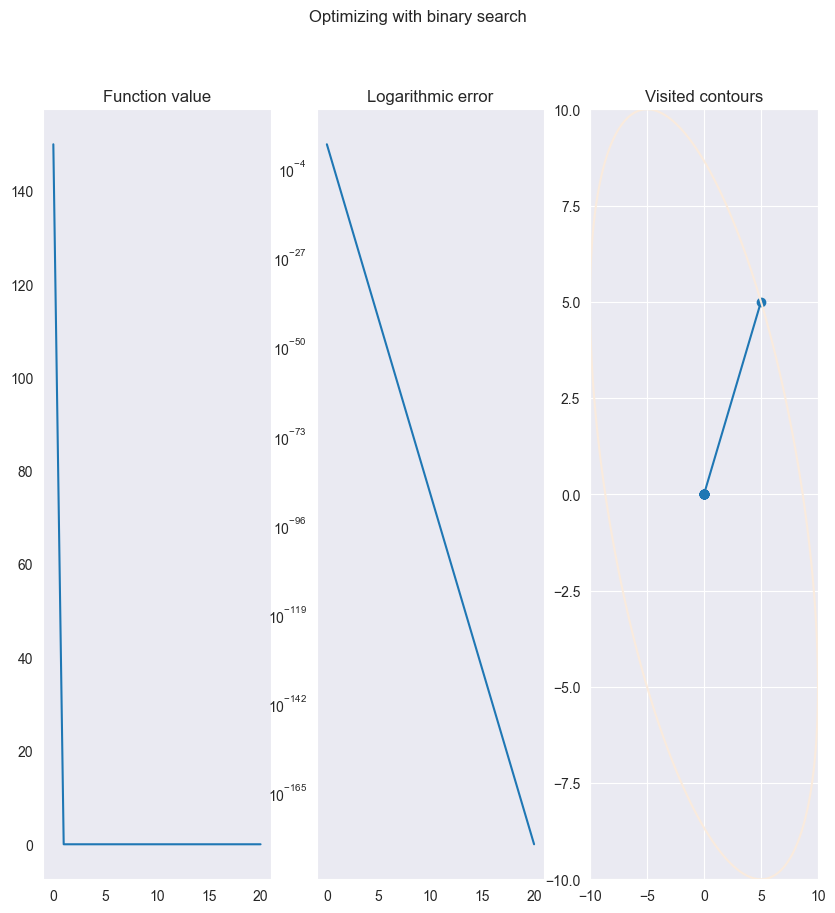

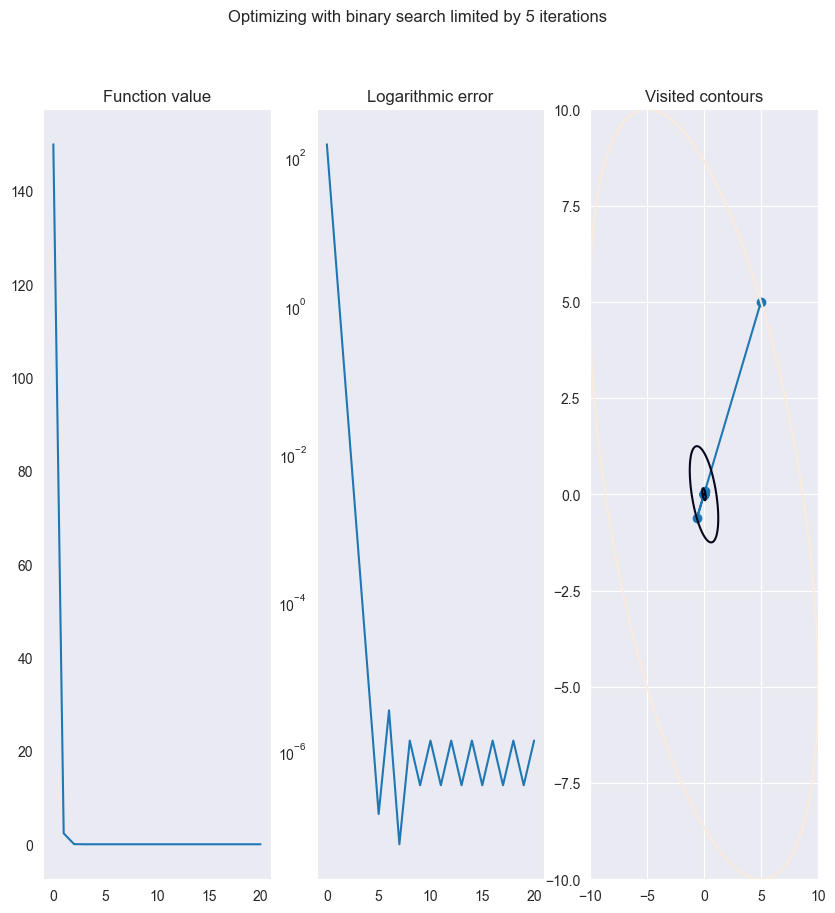

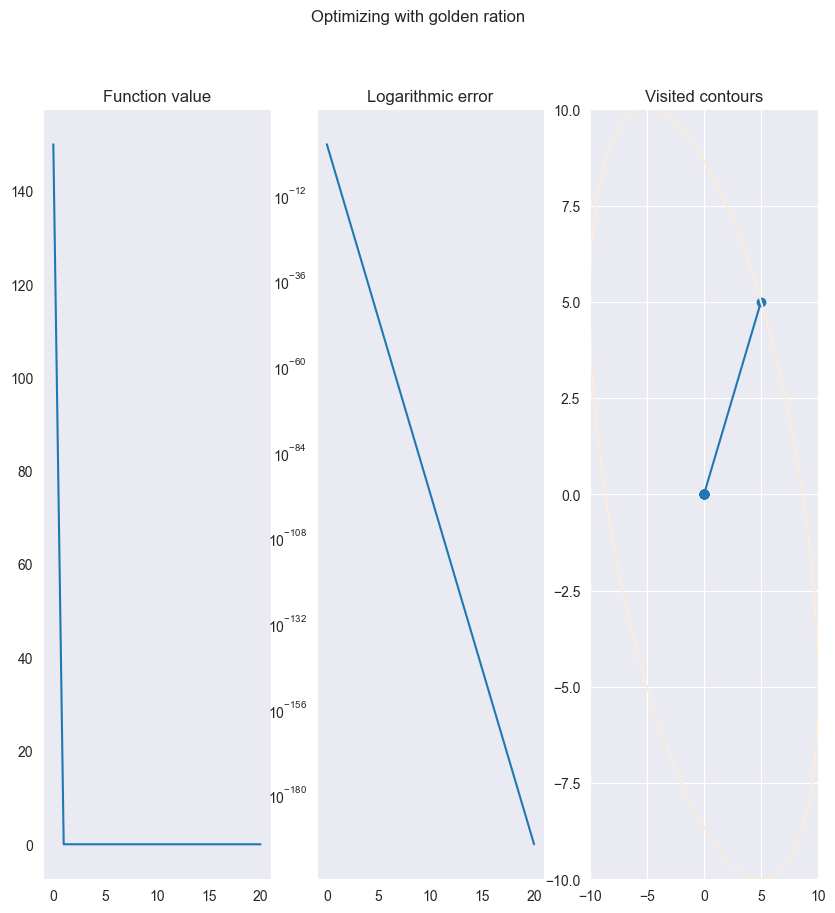

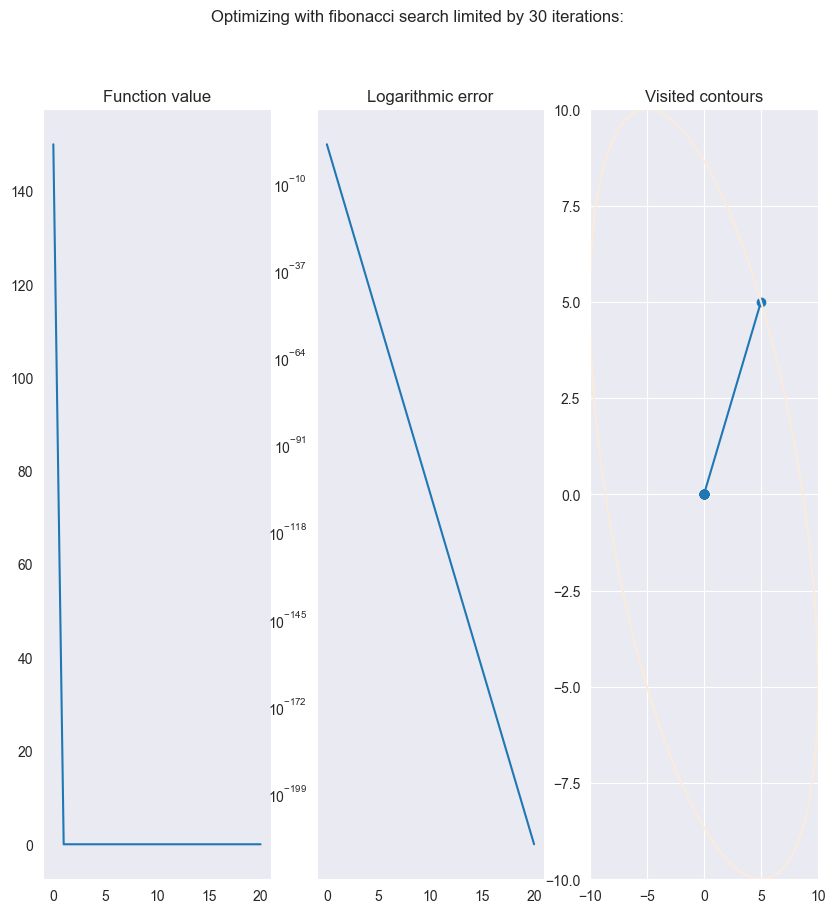

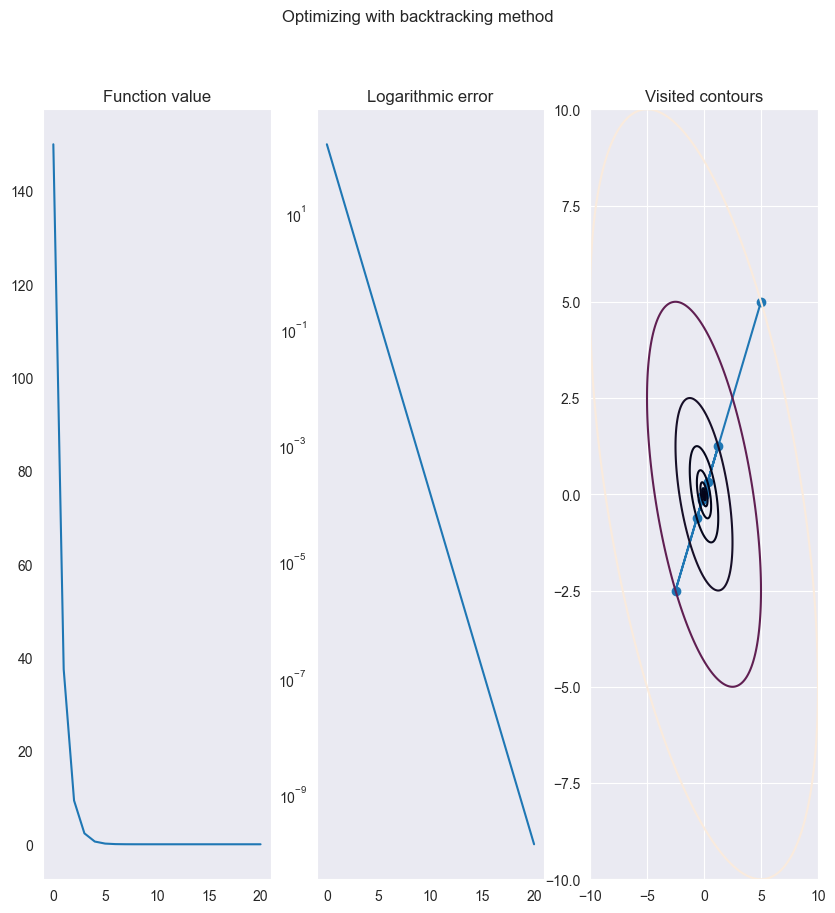

In [22]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.3],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=2, b=2, c=2, d=0, e=0
)

## Равномерное растяжение координат

Optimizing with fixed step = 0.1
Best value found: x* = [5.24288e-14 5.24288e-14] with f(x*) = 3.2985348833280665e-26
Optimizing with fixed step = 0.3
Best value found: x* = [9.96407445e+08 9.96407445e+08] with f(x*) = 1.1913933551689069e+19
Optimizing with binary search
Best value found: x* = [2.45454673e-90 2.45454673e-90] with f(x*) = 7.229759595308652e-179
Optimizing with binary search limited by 5 iterations
Best value found: x* = [6.65795596e-05 6.65795596e-05] with f(x*) = 5.319405314752847e-08
Optimizing with golden ration
Best value found: x* = [2.95988051e-89 2.95988051e-89] with f(x*) = 1.0513071189424218e-176
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [8.79400678e-102 8.79400678e-102] with f(x*) = 9.280146624743394e-202
Optimizing with backtracking method
Best value found: x* = [4.76837158e-06 4.76837158e-06] with f(x*) = 2.7284841053187847e-10


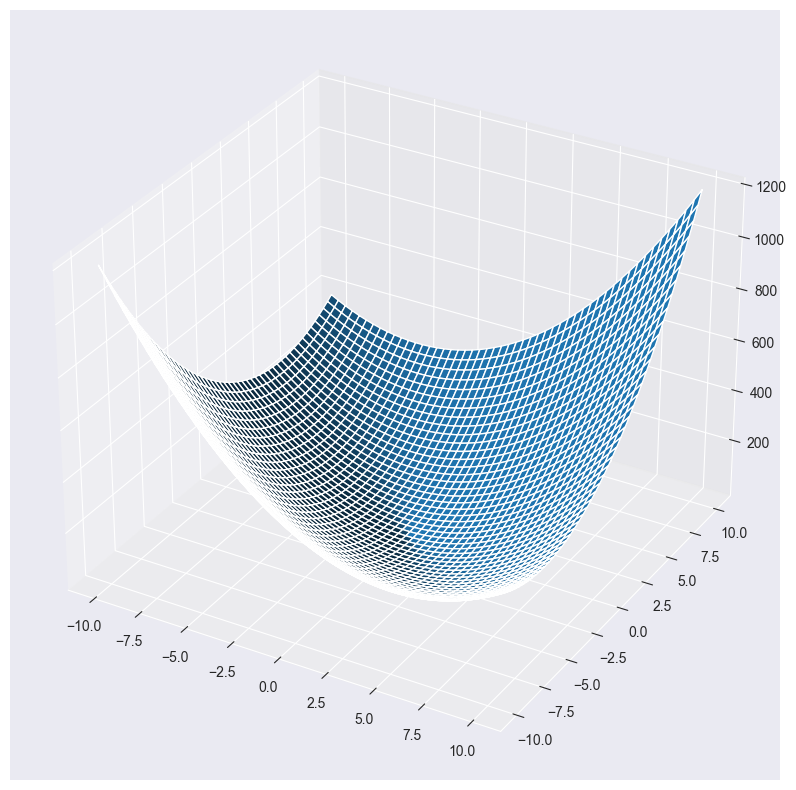

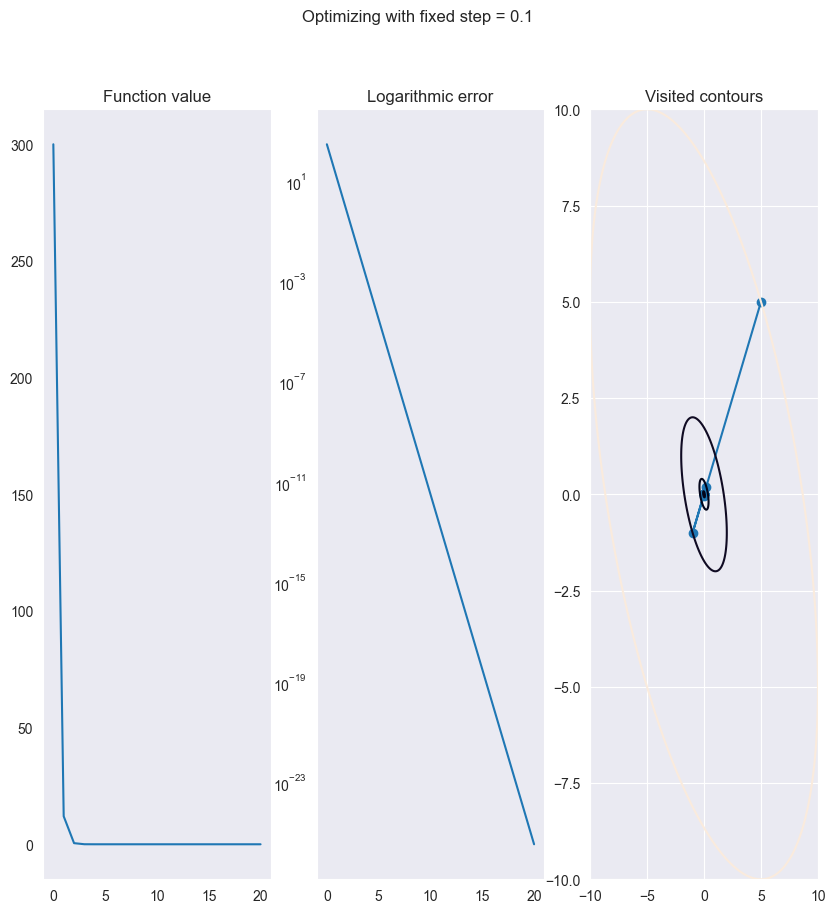

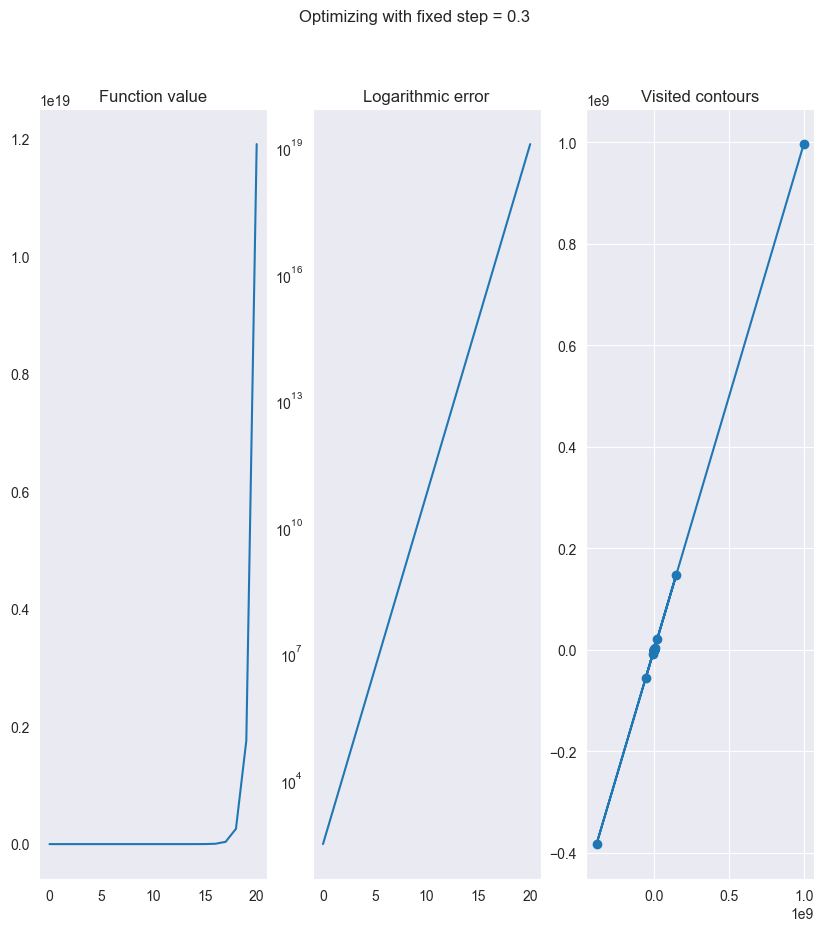

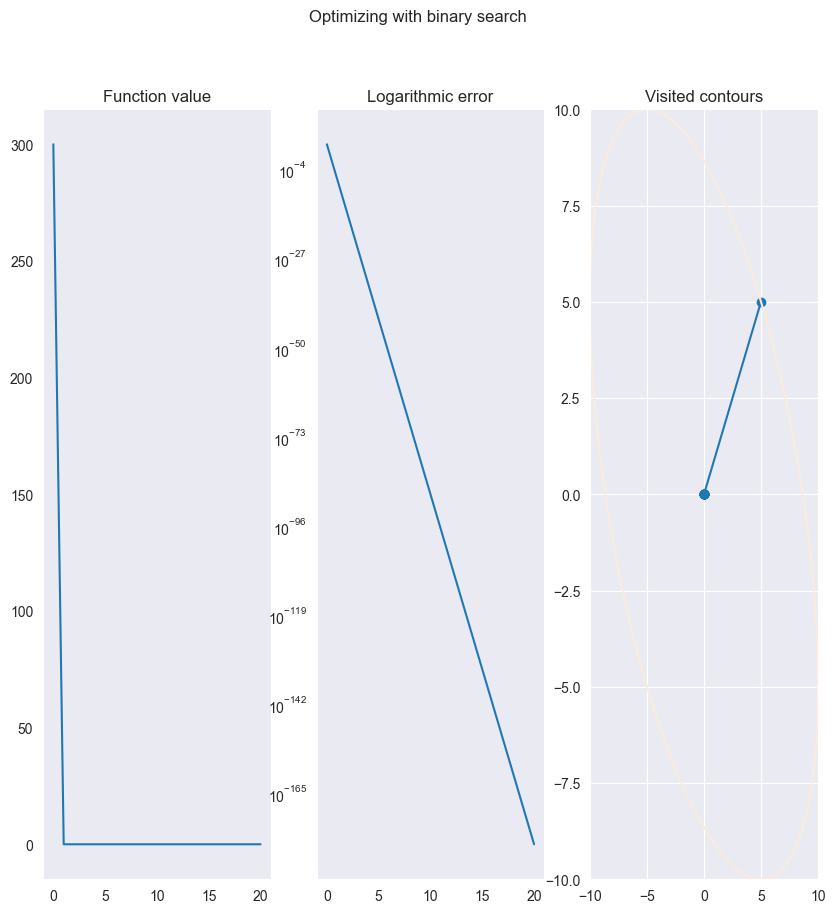

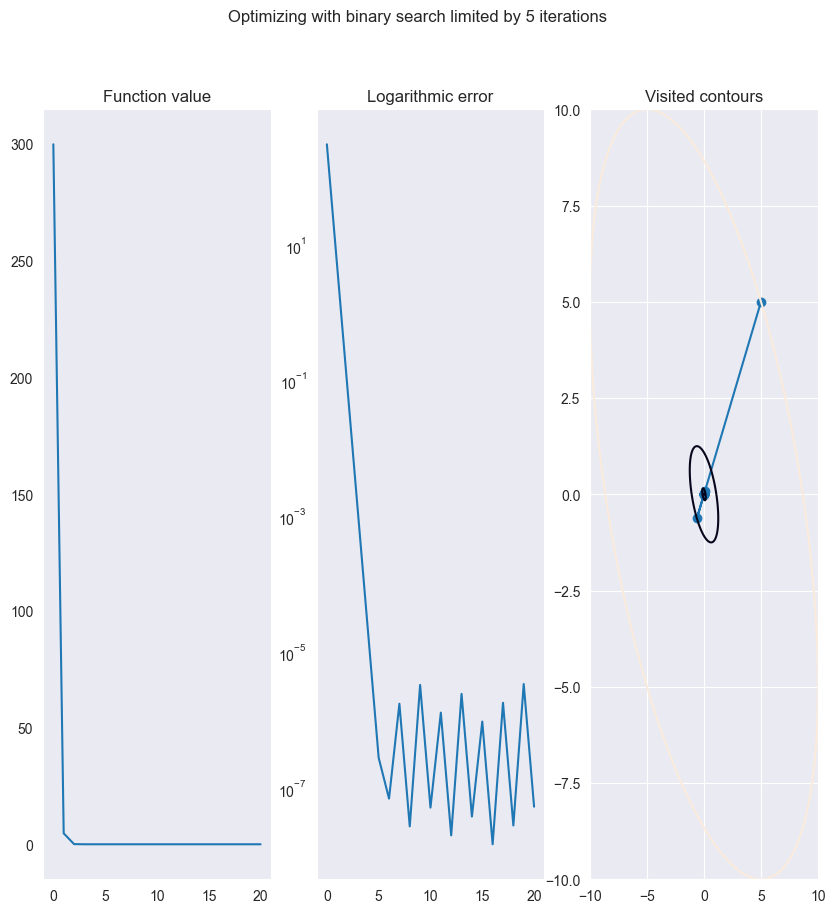

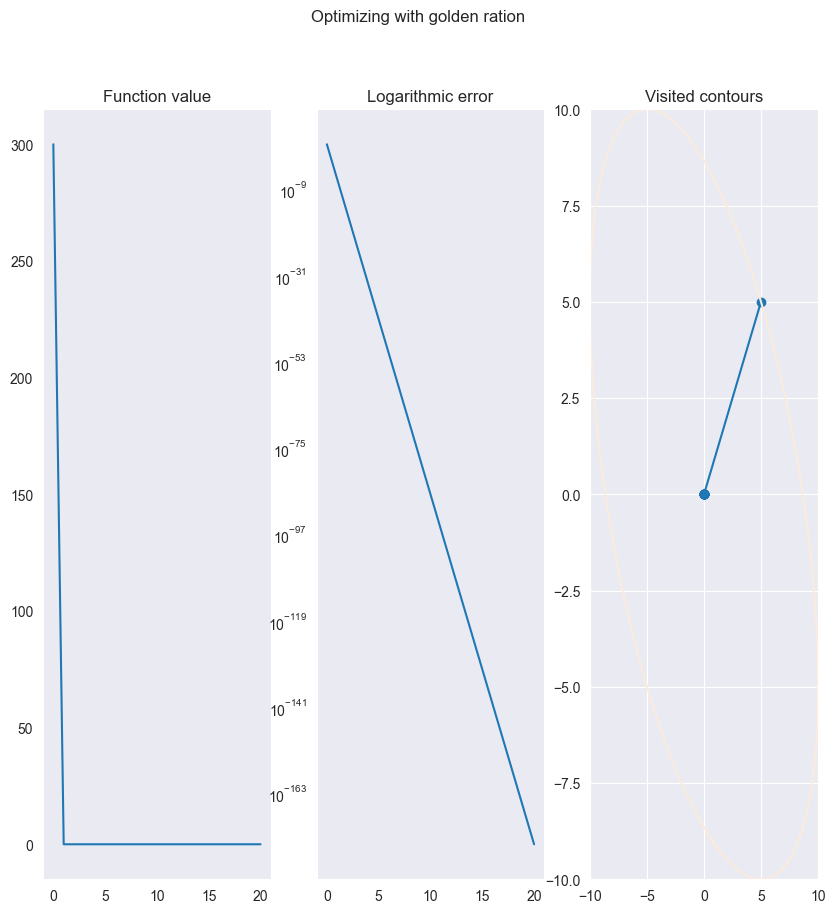

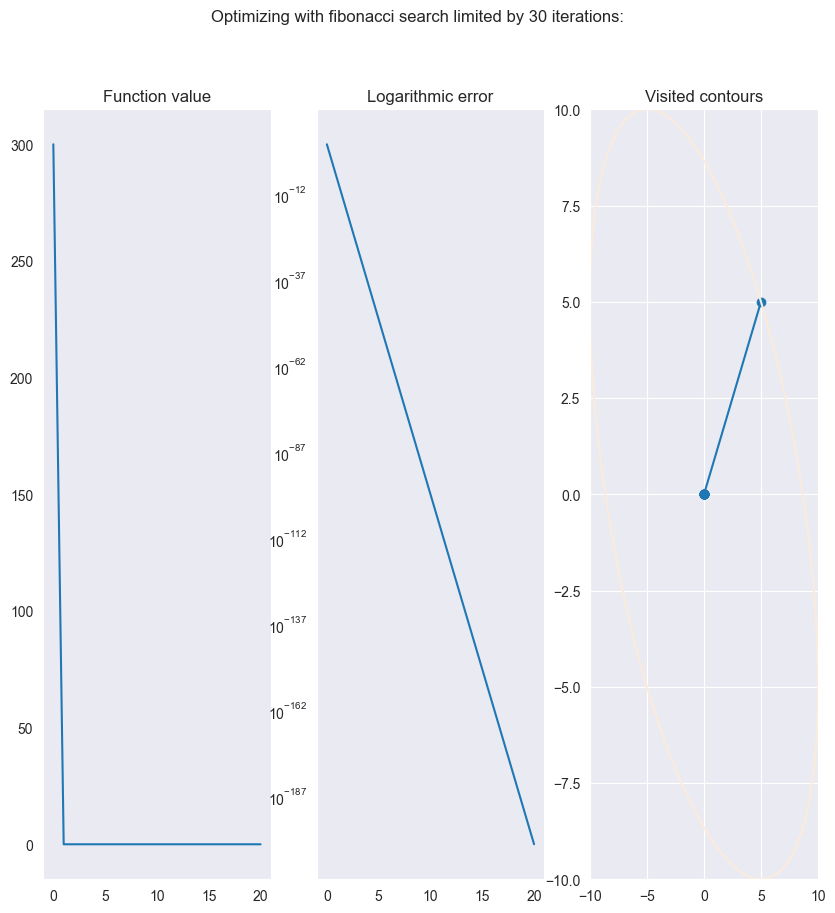

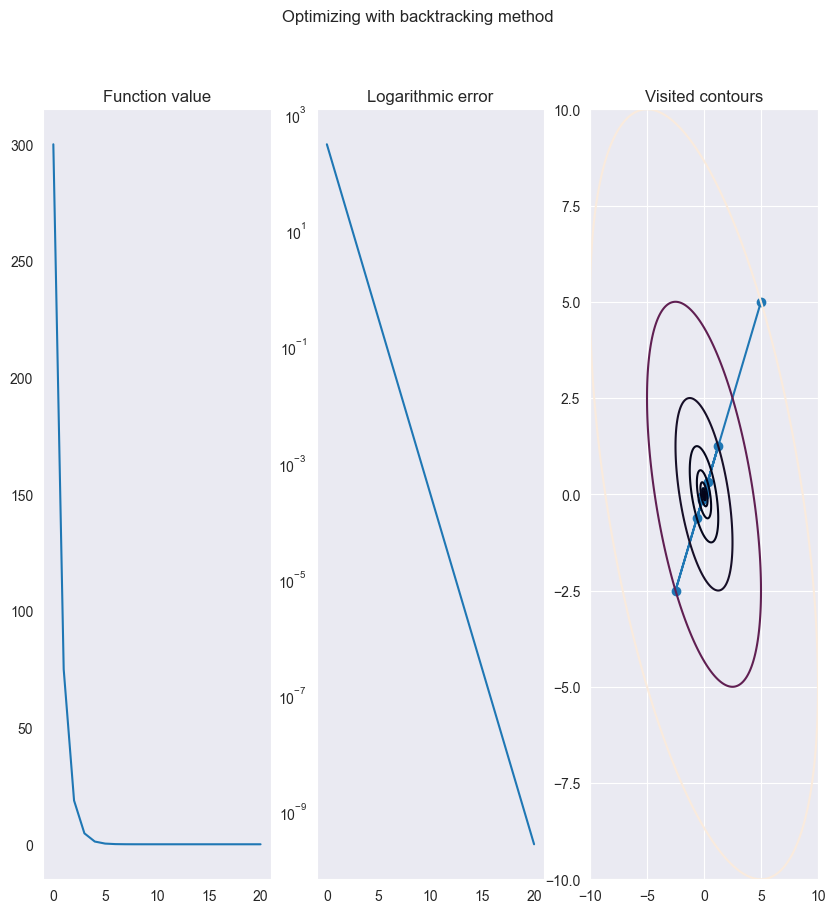

In [23]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.3],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=4, b=4, c=4, d=0, e=0
)

## Неравномерное растяжение координат

Optimizing with fixed step = 0.1
Best value found: x* = [0.00722776 0.00722776] with f(x*) = 0.0007313662529580116
Optimizing with fixed step = 0.3
Best value found: x* = [1.46071451e+13 4.42268769e+12] with f(x*) = 2.004481209866267e+27
Optimizing with binary search
Best value found: x* = [1.05364292e-14 1.14229527e-14] with f(x*) = 1.6305269378120126e-27
Optimizing with binary search limited by 5 iterations
Best value found: x* = [-0.00036585  0.00473768] with f(x*) = 3.9028942216420154e-05
Optimizing with golden ration
Best value found: x* = [1.17478872e-14 1.28987164e-14] with f(x*) = 2.042987269538964e-27
Optimizing with fibonacci search limited by 30 iterations:
Best value found: x* = [5.08047675e-15 5.16588059e-15] with f(x*) = 3.648431412509384e-28
Optimizing with backtracking method
Best value found: x* = [-3.57627869e-06  1.43051147e-05] with f(x*) = 3.069544618483633e-10


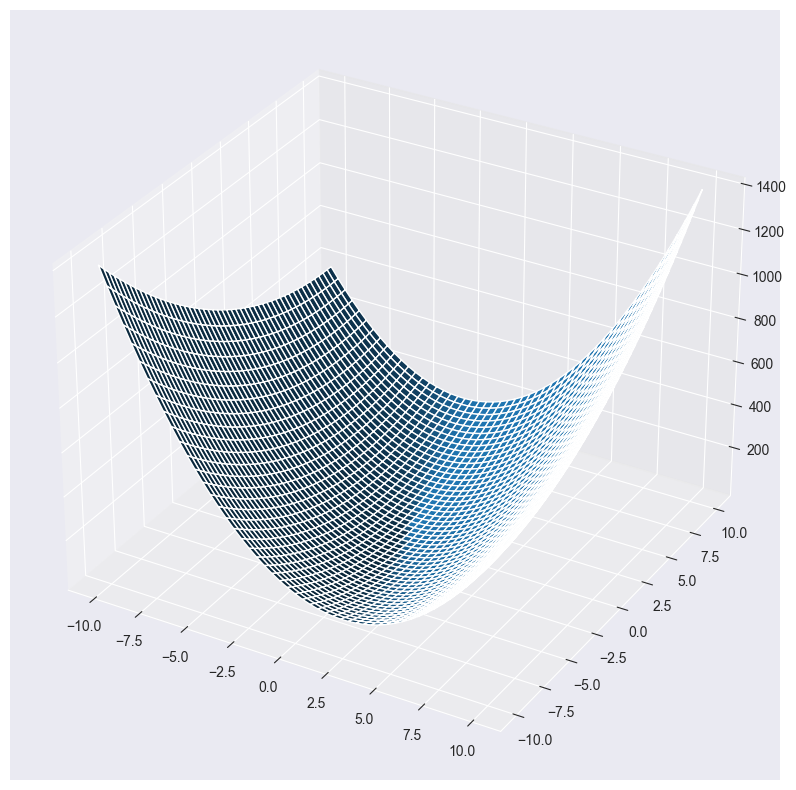

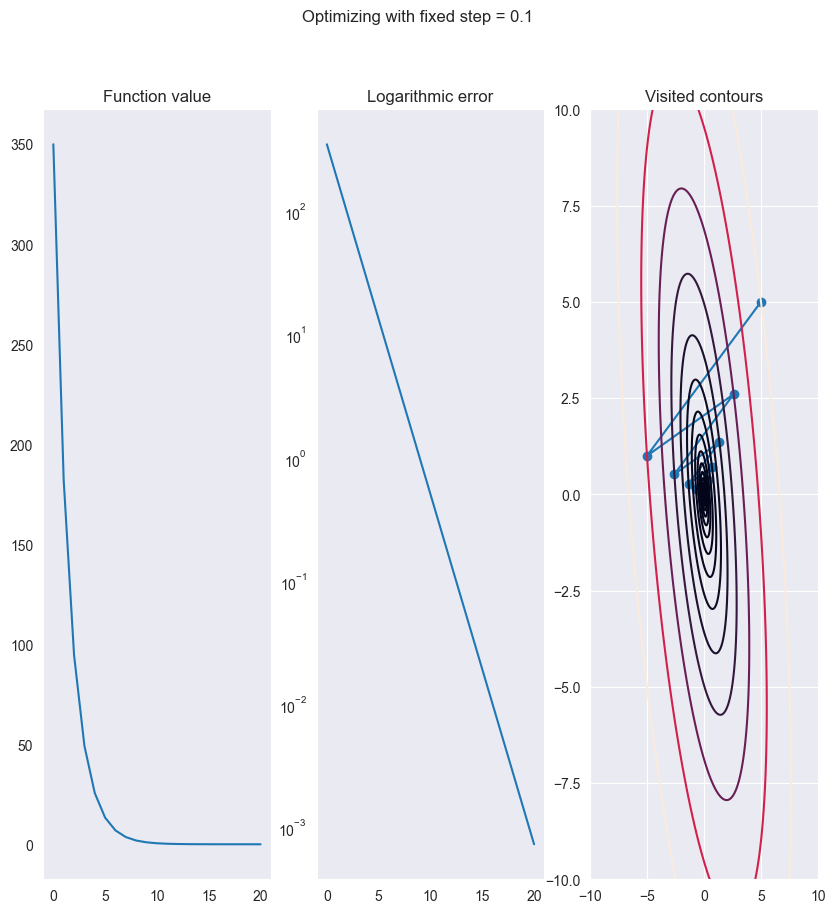

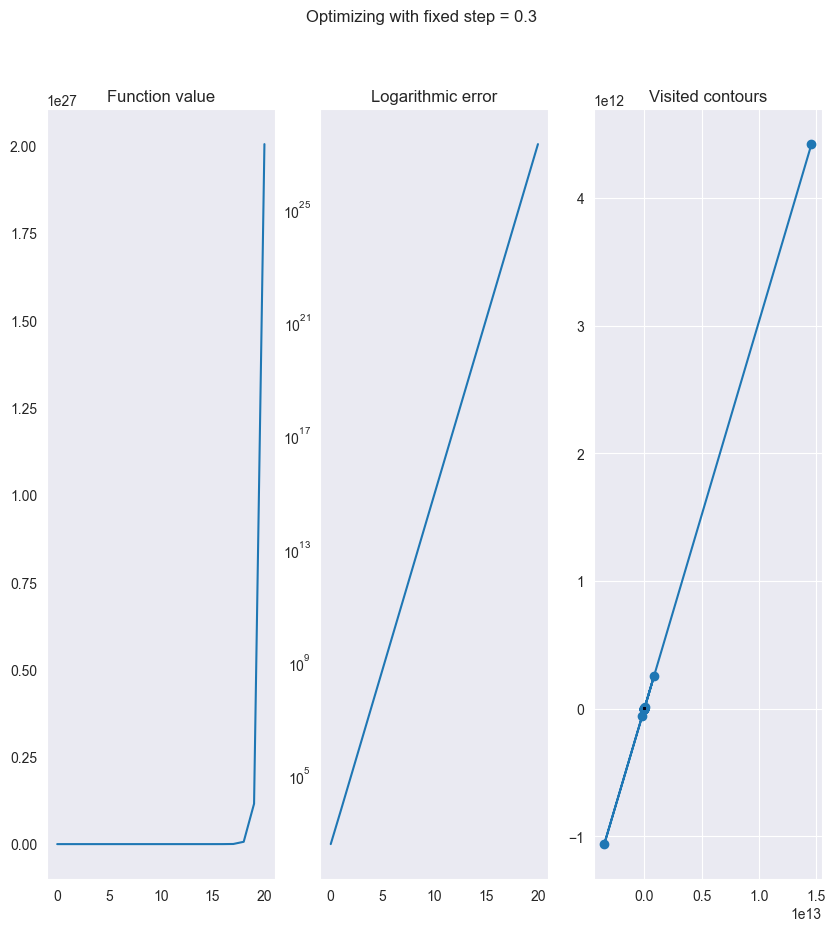

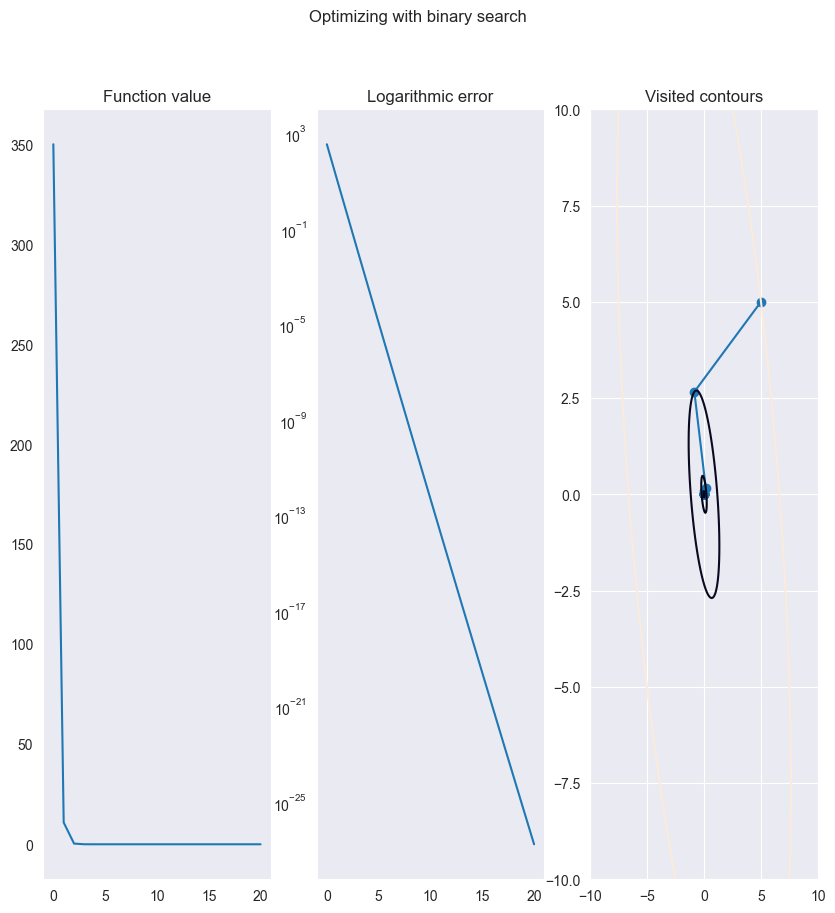

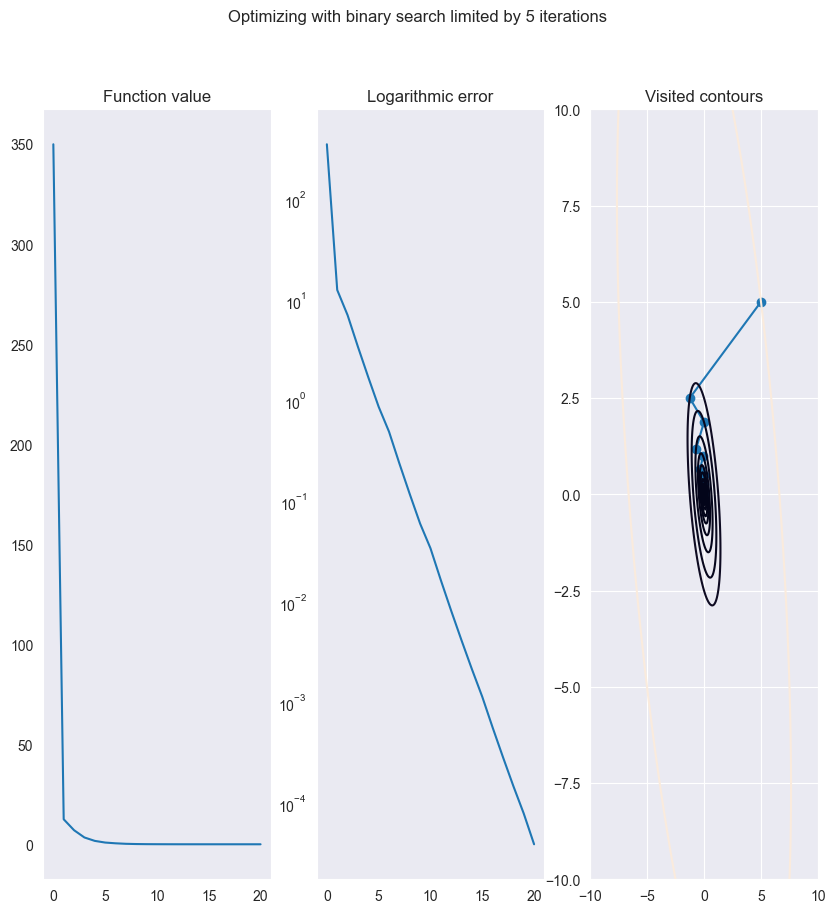

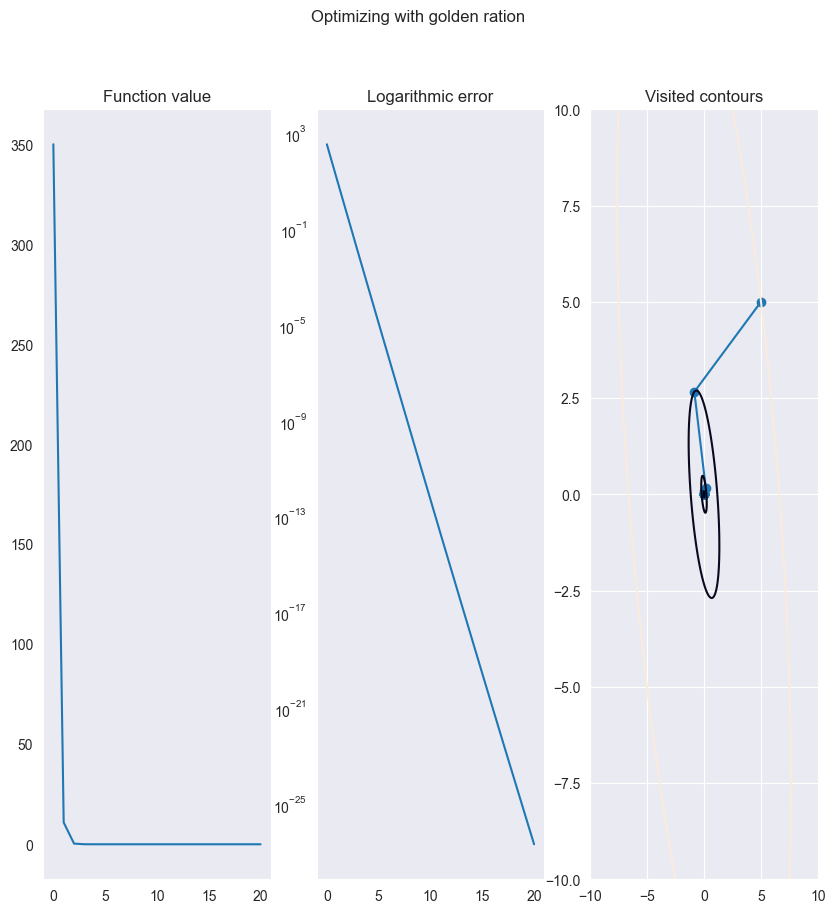

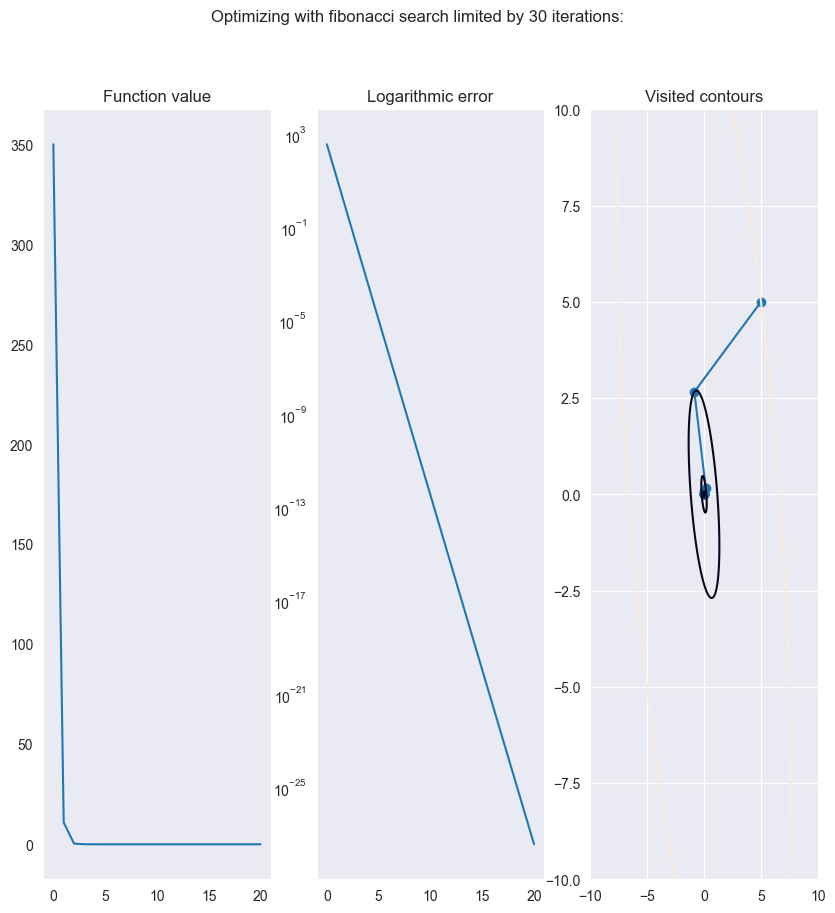

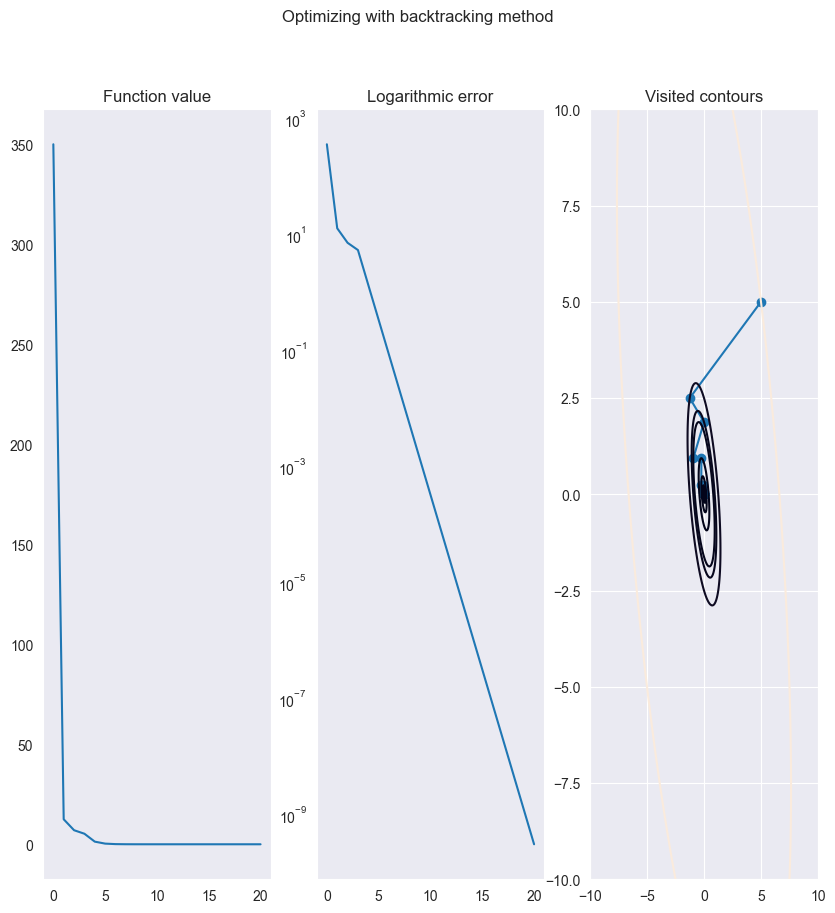

In [24]:
analyze_quadratic(
    roi=SearchRegion2d((-10, 10), (-10, 10)),
    fixed_steps=[0.1, 0.3],
    x0=np.array([5, 5]),
    bin_iters=5,
    fib_iters=30,
    a=8, b=4, c=2, d=0, e=0
)

## Канонизация квадратичных функций от двух переменных.

Пусть дана квадратичная функция от двух переменных $ax^2 + 2bxy + cy^2 + dx + ey + f$ и требуется найти $\min$. Очевидно, что константу $f$ можно вынести из операции нахождения минимума, поэтому задача сводится к $\min ax^2 + 2bxy + cy^2 + dx + ey$. Хочется избавиться от линейной части:
$ax^2 + 2bxy + cy^2 + dx + ey = a(x - x_0)^2 + 2b(x - x_0)(y - y_0) + c(y - y_0)^2 + C$.
Из этого получается набор уравнений:
\begin{equation}
    \begin{cases}
        ax_0 + by_0 = d\\
        bx_0 + cy_0 = e
    \end{cases}
\end{equation}

Из которой по теореме Крамера:
$$
x_0 =
\frac{
\begin{vmatrix}
    d & b \\
    e & c
\end{vmatrix}
} {
\begin{vmatrix}
    a & b \\
    b & c
\end{vmatrix}
}
\,
y_0 =
\frac{
\begin{vmatrix}
    a & d \\
    b & e
\end{vmatrix}
} {
\begin{vmatrix}
    a & b \\
    b & c
\end{vmatrix}
}
$$

Итого: нахождение минимума квадратичной функции от двух переменных сводится к нахождению минимума функции $$ax^2 + 2bxy + cy^2$$

## Классификация квадратичных форм.
1. Положительно определенная форма. У такой формы минимум находиться в точке $(0, 0)$, потому что во всех остальных точках форма положительна.
2. Отрицательно определенная форма. Если форма $f(x, y)$ отрицательна, то форма $-f(x, y)$ положительна, а значит у нее есть глобальный максимум в точке $(0, 0)$ и нет минимума, что делает задачу нахождения минимума бессмысленной.
3. Неопределенная форма. У такой формы нет минимума и максимума, но есть стационарная точка в $(0, 0)$. Поэтому в зависимости от начальной точки градиентный спуск либо уйдет в сторону бесконечного убывания функции, либо сойдется к стационарной точке.
4. Исключение линейной части невозможно в случае, когда определитель формы равен 0. Получается параболический цилиндр, у которого может быть минимум вдоль прямой или не быть минимума. Если выполнено условие $\frac{a}{b} = \frac{b}{c} = \frac{d}{e}$, то минимум будет достигаться вдоль прямой $2ax + 2by + d = 0$, иначе у функции отсутствует минимум.

